# Calculate BERTscore of 50 excerpts and their summaries

This notebook is for descriptive analysis of thesis "narrative analysis with large language models".

Bertscore helps to calculate the similarity score between two texts.

Codes reference: https://haticeozbolat17.medium.com/text-summarization-how-to-calculate-bertscore-771a51022964#:~:text=BertScore%20is%20a%20method%20used,gram%2Dbased%20metrics%20often%20encounter

## Install BERTscore

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data loading
data = pd.read_csv('C:/Users/idaid/Desktop/Brahe_Novels.csv')

# Descriptive stats
print(data.describe())
print(data.info())

c:\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


                                                full_text instruction_id  \
count                                                8226           8226   
unique                                               8226           8226   
top     It's a complicated story, old man," began Matv...  1944_123775_1   
freq                                                    1              1   

                                                 analysis  
count                                                8226  
unique                                               8226  
top     Summary: The story is about an old widow and h...  
freq                                                    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8226 entries, 0 to 8225
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   full_text       8226 non-null   object
 1   instruction_id  8226 non-null   object
 2   analysis        8226 non-null   

In [3]:
! pip install bert-score

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/


In [4]:
! pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/


The following is an example at a basic level.

In [6]:
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# Example texts
reference = "It's a complicated story, old man,began Matvey Savitch, and if I were to tell you all just as it happened, it would take all night and more. Ten years ago in a little house in our street, next door to me, where now there's a tallow and oil factory, there was living an old widow, Marfa Semyonovna Kapluntsev, and she had two sons: one was a guard on the railway, but the other, Vasya, who was just my own age, lived at home with his mother. Old Kapluntsev had kept five pair of horses and sent carriers all over the town; his widow had not given up the business, but managed the carriers as well as her husband had done, so that some days they would bring in as much as five roubles from their rounds. The young fellow, too, made a trifle on his own account. He used to breed fancy pigeons and sell them to fanciers; at times he would stand for hours on the roof, waving a broom in the air and whistling; his pigeons were right up in the clouds, but it wasn't enough for him, and he'd want them to go higher yet. Siskins and starlings, too, he used to catch, and he made cages for sale. All trifles, but, mind you, he'd pick up some ten roubles a month over such trifles. Well, as time went on, the old lady lost the use of her legs and took to her bed."
candidate = "The story is about an old widow and her sons, particularly one son named Vasya who breeds pigeons and sells them for extra money.."
# BERTScore calculation
scorer = BERTScorer(model_type='bert-base-uncased')
P, R, F1 = scorer.score([candidate], [reference])
print(f"BERTScore Precision: {P.mean():.4f}, Recall: {R.mean():.4f}, F1: {F1.mean():.4f}")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERTScore Precision: 0.6118, Recall: 0.3902, F1: 0.4765


Another example is a level intermediate. 

Note: The similarity scores of my thesis will be calculated in this way.

In [8]:
# Step 1: Import the required libraries
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Step 2: Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Step 3: Define the two texts to compare
#Passage E56
text1= "It was an age of valetudinarians, in many instances of imaginary ones ; but below its various crazes concerning health and disease, largely multiplied a few years after the time of which I am speaking by the miseries of a great pestilence, lay a valuable, because partly practicable, belief that all the maladies of the soit might be reached through the subtle gateways of the body. Salis salvation for the Romans, had come to mean bodily sanity ; and the religion of the god of VOL. I. D 34 MARIUS THE EPICUREAN. bodily health Salvator, as they called him, absolutely had a chance just then of becoming the one religion; that mild and philanthropic son of Apollo surviving, or absorbing, all other pagan godhead. The apparatus of the medical art, the salutary mineral or herb, diet or abstinence, and all the varieties of the bath, came to have a kind of sacramental character ; so deep was the feeling, in more serious minds, of a moral or spiritual profit in physical health, beyond the obvious bodily advantages one had of it ; the body becoming truly, in that case, but a quiet handmaid of the soul. The priesthood or family of Aesculapius, a vast college, believed to be in possession of certain precious medical secrets, came nearest perhaps, of all the institutions of the pagan world, to the Christian priesthood; the temples of the god, rich, in some instances, with the accumulated thank-offerings of centuries of a tasteful devotion, being really also a kind of hospitals for the sick, administered in a full conviction of the religiousness, the refined and sacred happiness, of a life spent in the relieving of pain. Elements of a really experimental and progressive knowledge there were doubtless amid this devout enthusiasm, bent so faithfully on the reception of health as a direct gift from God ; but for the most ]part his care was held to take effect through a machinery easily capable of misuse for purposes of religious fraud. It Alas above all through dreams, inspired by Aesculapius himself, that information as to the cause and cure of a malady was held to come Marius THE Epicurean. 35 to the sufferer, in a belief based on the truth that dreams do sometimes, for those who watch them carefully', give many hints concerning the conditions of the body those latent weak points at Which disease or death may most easily break into it. In the time of Marcus Aurelius these medical dreams had become more than ever a fashionable caprice. Aristeides, the Orator, a man of undoubted intellectual power, has devoted six discourses to their interpretation ; the really scientific Galen has recorded how beneficently they had intervened in his own case, at certain turning-points of life ; and a belief in them was one of the frailties of the wise emperor himself."
text2= "The text discusses the belief in the connection between physical health and spiritual well-being during a time of great pestilence."

# Step 4: Prepare the texts for BERT
inputs1 = tokenizer(text1, return_tensors="pt", padding=True, truncation=True)
inputs2 = tokenizer(text2, return_tensors="pt", padding=True, truncation=True)

# Step 5: Feed the texts to the BERT model
outputs1 = model(**inputs1)
outputs2 = model(**inputs2)

# Step 6: Obtain the representation vectors
embeddings1 = outputs1.last_hidden_state.mean(dim=1).detach().numpy()
embeddings2 = outputs2.last_hidden_state.mean(dim=1).detach().numpy()

# Step 7: Calculate cosine similarity
similarity = np.dot(embeddings1, embeddings2.T) / (np.linalg.norm(embeddings1) * np.linalg.norm(embeddings2))

# Step 8: Print the result
print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Similarity between the texts: 0.7079


In [7]:
# Step 1: Import the required libraries
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Step 2: Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

#passage E164
text3= "Could I wander no farther than my legs could carry me; and were my rambles confined to so much as might be accomplished between sun and sun ? It was my own voluntary choice, that brought me back each successive evening, to the house in which I had resided ever since my escape from Ireland. I might emancipate myself from this restriction whenever I pleased. I might contrive the scheme of a secret elopement. But, if I desired to use my freedom with this additional enlargement, would elopement be the wisest way ot accomplishing that? Might I not form a project of departure and absence, to which it should not be difficult to obtain my uncle's consent ? When I thought of absenting myself for a time from this scene of my early years, the first suggestion that offered to me was that of paying a visit to my beloved sister. How much further the mandeville. 193 genius of romance, when I had put myself under his guidance, might conduct me, I could not tell. But, if I were enabled to execute any part of the project that now rose to my thoughts, I determined that the first stage in my journey kings, the first branch of the inheritance of pleasure I proposed to myself, should be, once again to embrace my dear Henrietta. 1 endeavoured in another way to anticipate the events of my future history. I was left to my own devices. No one of the houshold had the presumption to talk to me of my future destination ; and the silence and reserve of my own nature prevented me from inviting them to enter on the topic. But was my education ended ? I was not so ignorant of the rules of political society, as not to know that ten years more must elapse, before I should be acknowledged by the laws of my country as my own master. How was this period to be filled up ? Sh jitld I receive no VOL I. I 194 MANDEVILLE. more instruction in learning ? Would some reverend divine, hitherto a stranger, be introduced as the successor of Hilkiah, to superintend my studies, and keep alive the devotions of Mandeville House ? This was a very anxious question to me. If .the authority and the magisterial rebukes of Mr Bradford, familiarised as I had been to them from my earliest years, had proved an intolerable torment, vi'ith what patience could I think of being subjected upon the same terms to an entire stranger ?"
text4= "The protagonist considers their options for their future and contemplates visiting their sister."
# Step 4: Prepare the texts for BERT
inputs3 = tokenizer(text3, return_tensors="pt", padding=True, truncation=True)
inputs4 = tokenizer(text4, return_tensors="pt", padding=True, truncation=True)

# Step 5: Feed the texts to the BERT model
outputs3 = model(**inputs3)
outputs4 = model(**inputs4)

# Step 6: Obtain the representation vectors
embeddings3 = outputs3.last_hidden_state.mean(dim=1).detach().numpy()
embeddings4 = outputs4.last_hidden_state.mean(dim=1).detach().numpy()

# Step 7: Calculate cosine similarity
similarity = np.dot(embeddings3, embeddings4.T) / (np.linalg.norm(embeddings3) * np.linalg.norm(embeddings4))

# Step 8: Print the result
print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Similarity between the texts: 0.5951


In [20]:
#passage E278
text5= "It is a passive feeling capable of being roused for any object, as the vine can grow on any tree; and the wisdom of the world recognises its strength when it urges a girl to marry the man who wants her with the assurance that love will follow. It is an emotion made up of the satisfaction in security, pride of property, the pleasure of being desired, the gratification of a household, and it is only by an amiable vanity that women ascribe to it spiritual value. It is an emotion which is defenceless against passion. I suspected that Blanche Stroeve's violent dislike of Strickland had in it from the beginning a vague element of sexual attraction. Who am I that I should seek to unravel the mysterious intricacies of sex? Perhaps Stroeve's passion excited without satisfying that part of her nature, and she hated Strickland because she felt in him the power to give her what she needed. I think she was quite sincere when she struggled against her husband's desire to bring him into the studio; I think she was frightened of him, though she knew not why; and I remembered how she had foreseen disaster. I think in some curious way the horror which she felt for him was a transference of the horror which she felt for herself because he so strangely troubled her. His appearance was wild and uncouth; there was aloofness in his eyes and sensuality in his mouth; he was big and strong; he gave the impression of untamed passion; and perhaps she felt in him, too, that sinister element which had made me think of those wild beings of the world's early history when matter, retaining its early connection with the earth, seemed to possess yet a spirit of its own. If he affected her at all, it was inevitable that she should love or hate him. She hated him. And then I fancy that the daily intimacy with the sick man moved her strangely. She raised his head to give him food, and it was heavy against her hand; when she had fed him she wiped his sensual mouth and his red beard. She washed his limbs; they were covered with thick hair; and when she dried his hands, even in his weakness they were strong and sinewy. His fingers were long; they were the capable, fashioning fingers of the artist; and I know not what troubling thoughts they excited in her. He slept very quietly, without a movement, so that he might have been dead, and he was like some wild creature of the woods, resting after a long chase; and she wondered what fancies passed through his dreams. Did he dream of the nymph flying through the woods of Greece with the satyr in hot pursuit?"
text6= "The passage explores the emotions and attraction between characters in the context of love and desire."

inputs5 = tokenizer(text5, return_tensors="pt", padding=True, truncation=True)
inputs6 = tokenizer(text6, return_tensors="pt", padding=True, truncation=True)

outputs5 = model(**inputs5)
outputs6 = model(**inputs6)

embeddings5 = outputs5.last_hidden_state.mean(dim=1).detach().numpy()
embeddings6 = outputs6.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings5, embeddings6.T) / (np.linalg.norm(embeddings5) * np.linalg.norm(embeddings6))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6685


In [25]:
#passage E2
text7 = "It's a complicated story, old man,began Matvey Savitch, and if I were to tell you all just as it happened, it would take all night and more. Ten years ago in a little house in our street, next door to me, where now there's a tallow and oil factory, there was living an old widow, Marfa Semyonovna Kapluntsev, and she had two sons: one was a guard on the railway, but the other, Vasya, who was just my own age, lived at home with his mother. Old Kapluntsev had kept five pair of horses and sent carriers all over the town; his widow had not given up the business, but managed the carriers as well as her husband had done, so that some days they would bring in as much as five roubles from their rounds. The young fellow, too, made a trifle on his own account. He used to breed fancy pigeons and sell them to fanciers; at times he would stand for hours on the roof, waving a broom in the air and whistling; his pigeons were right up in the clouds, but it wasn't enough for him, and he'd want them to go higher yet. Siskins and starlings, too, he used to catch, and he made cages for sale. All trifles, but, mind you, he'd pick up some ten roubles a month over such trifles. Well, as time went on, the old lady lost the use of her legs and took to her bed."
text8 = "The story is about an old widow and her sons, particularly one son named Vasya who breeds pigeons and sells them for extra money.."

inputs7 = tokenizer(text7, return_tensors="pt", padding=True, truncation=True)
inputs8 = tokenizer(text8, return_tensors="pt", padding=True, truncation=True)

outputs7 = model(**inputs7)
outputs8 = model(**inputs8)

embeddings7 = outputs7.last_hidden_state.mean(dim=1).detach().numpy()
embeddings8 = outputs8.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings7, embeddings8.T) / (np.linalg.norm(embeddings7) * np.linalg.norm(embeddings8))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.8089


In [26]:
#passage E7
text9 = "Of course he would come at his own odd hours, often just as one was dressing to go out and dine, and I can even remember finding him there when I returned, for I had long since given him a key of the flat. It was the inhospitable month of February, and I can recall more than one cosy evening when we discussed anything and everything but our own malpractices; indeed, there were none to discuss just then. Raffles, on the contrary, was showing himself with some industry in the most respectable society, and by his advice I used the club more than ever. There is nothing like it at this time of year,said he. In the summer I have my cricket to provide me with decent employment in the sight of men. Keep yourself before the public from morning to night, and they'll never think of you in the still small hours."" Our behavior, in fine, had so long been irreproachable that I rose without misgiving on the morning of Lord Thornaby's dinner to the other Criminologists and guests. My chief anxiety was to arrive under the 忙gis of my brilliant friend, and I had begged him to pick me up on his way; but at five minutes to the appointed hour there was no sign of Raffles or his cab. We were bidden at a quarter to eight for eight o'clock, so after all I had to hurry off alone."
text10 = "The narrator recalls a time when their friend Raffles would often visit their apartment at odd hours. They discuss various topics and Raffles advises the narrator to be seen in public to avoid suspicion. On the morning of a dinner, the narrator waits for Raffles, but he is late and the narrator ends up going alone."

inputs9 = tokenizer(text9, return_tensors="pt", padding=True, truncation=True)
inputs10 = tokenizer(text10, return_tensors="pt", padding=True, truncation=True)

outputs9 = model(**inputs9)
outputs10 = model(**inputs10)

embeddings9 = outputs9.last_hidden_state.mean(dim=1).detach().numpy()
embeddings10 = outputs10.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings9, embeddings10.T) / (np.linalg.norm(embeddings9) * np.linalg.norm(embeddings10))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.8052


In [28]:
#passage E15
text11 = "Three plays have been accepted, and two more are commissioned. Oh! my dear, I am lost, all is darkness around me. I would set fire to the house in a moment if that would bring light. What does it all mean? Is he ashamed of taking money from me? He is too high-minded for so trumpery a matter to weigh with him. Besides, scruples of the kind could only be the outcome of some love affair. A man would take anything from his wife, but from the woman he has ceased to care for, or is thinking of deserting, it is different. If he needs such large sums, it must be to spend them on a woman. For himself, why should he hesitate to draw from my purse? Our savings amount to one hundred thousand francs! In short, my sweetheart, I have explored a whole continent of possibilities, and after carefully weighing all the evidence, am convinced I have a rival. I am deserted for whom? At all costs I must see the unknown. July 10th. Light has come, and it is all over with me. Yes, Renee, at the age of thirty, in the perfection of my beauty, with all the resources of a ready wit and the seductive charms of dress at my command, I am betrayed and for whom? A large-boned Englishwoman, with big feet and thick waist a regular British cow! There is no longer room for doubt. I will tell you the history of the last few days. Worn out with suspicions, which were fed by Gaston's guilty silence (for, if he had helped a friend, why keep it a secret from me?), his insatiable desire for money, and his frequent journeys to Paris; jealous too of the work from which he seemed unable to tear himself, I at last made up my mind to take certain steps, of such a degrading nature that I cannot tell you about them. Suffice it to say that three days ago I ascertained that Gaston, when in Paris, visits a house in the Rue de la Ville l'Eveque, where he guards his mistress with jealous mystery, unexampled in Paris. The porter was surly, and I could get little out of him, but that little was enough to put an end to any lingering hope, and with hope to life. On this point my mind was resolved, and I only waited to learn the whole truth first. With this object I went to Paris and took rooms in a house exactly opposite the one which Gaston visits. Thence I saw him with my own eyes enter the courtyard on horseback. Too soon a ghastly fact forced itself on me. This Englishwoman, who seems to me about thirty-six, is known as Mme. Gaston. This discovery was my deathblow. I saw him next walking to the Tuileries with a couple of children. Oh! my dear, two children, the living images of Gaston!"
text12 = "The narrator suspects her partner of infidelity and sets out to gather evidence, eventually discovering that he has a wife and children with another woman."

inputs11 = tokenizer(text11, return_tensors="pt", padding=True, truncation=True)
inputs12 = tokenizer(text12, return_tensors="pt", padding=True, truncation=True)

outputs11 = model(**inputs11)
outputs12 = model(**inputs12)

embeddings11 = outputs11.last_hidden_state.mean(dim=1).detach().numpy()
embeddings12 = outputs12.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings11, embeddings12.T) / (np.linalg.norm(embeddings11) * np.linalg.norm(embeddings12))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7298


In [29]:
#passage E3650
text13 = "If you fellows take down what I say from time to time in note-books, as you ought to do, you'll remember that I offered to give anyone odds that Kay's would out us in the final. I always said that a really hot man like Fenn was more good to a side than half-a-dozen ordinary men. He can do all the bowling and all the batting. All the fielding, too, in the slips."" Tea was just over at Blackburn's, and the bulk of the house had gone across to preparation in the school buildings. The prefects, as was their custom, lingered on to finish the meal at their leisure. These after-tea conversations were quite an institution at Blackburn's. The labours of the day were over, and the time for preparation for the morrow had not yet come. It would be time to be thinking of that in another hour. Meanwhile, a little relaxation might be enjoyed. Especially so as this was the last day but two of the summer term, and all necessity for working after tea had ceased with the arrival of the last lap of the examinations. Silver was head of the house, and captain of its cricket team, which was nearing the end of its last match, the final for the inter-house cup, and on paper getting decidedly the worst of it. After riding in triumph over the School House, Bedell's, and Mulholland's, Blackburn's had met its next door neighbour, Kay's, in the final, and, to the surprise of the great majority of the school, was showing up badly. The match was affording one more example of how a team of average merit all through may sometimes fall before a one-man side. Blackburn's had the three last men on the list of the first eleven, Silver, Kennedy, and Challis, and at least nine of its representatives had the reputation of being able to knock up a useful twenty or thirty at any time. Kay's, on the other hand, had one man, Fenn. After him the tail started. But Fenn was such an exceptional all-round man that, as Silver had said, he was as good as half-a-dozen of the Blackburn's team, equally formidable whether batting or bowling he headed the school averages at both. He was one of those batsmen who seem to know exactly what sort of ball you are going to bowl before it leaves your hand, and he could hit like another Jessop. As for his bowling, he bowled left hand always a puzzling eccentricity to an undeveloped batsman and could send them down very fast or very slow, as he thought best, and it was hard to see which particular brand he was going to serve up before it was actually in mid-air. But it is not necessary to enlarge on his abilities. The figures against his name in Wisden prove a good deal."
text14 = "The narrator discusses a cricket match between Blackburn's and Kay's, focusing on the exceptional skills of Fenn from Kay's."

inputs13 = tokenizer(text13, return_tensors="pt", padding=True, truncation=True)
inputs14 = tokenizer(text14, return_tensors="pt", padding=True, truncation=True)

outputs13 = model(**inputs13)
outputs14 = model(**inputs14)

embeddings13 = outputs13.last_hidden_state.mean(dim=1).detach().numpy()
embeddings14 = outputs14.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings13, embeddings14.T) / (np.linalg.norm(embeddings13) * np.linalg.norm(embeddings14))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7478


In [30]:
#passage E151
text15 = "She played with great spirit, but appeared so diminutive on the stage, that a gentleman whimsically said,  he could hear her very well, but he could riot see lier without a glass. In her sixteenth year, she appeared at the same theatre, as Juliet, and met with so much applause, that she was immediately engaged, at a good salary, by the managers of Covent Garden, at which theatre she continued, with the exception of one winter passed in Liverpool, for the next twenty years. Besides sustaining a respectable line in tragedy, Mrs. Mattocks was the Rosetta, Polly, &c., of the theatre ;  but she has latterly,says a critic, writing in 1800,  devoted herself entirely to the comic muse, whose cause she supports with admirable spirit, and with a peculiarity of humour, which, though it may sometimes exceed the precise limitations of critical propriety, is richly comic, and perfectly original. She died on the 26th of June, 1826. VVEWITZER, (RALPH,) was born, about the year 1748, in London, where lie carried on, for some time, the business of a jeweller. His sister was a favourite actress and singer, and for her benefit, he made his first appearance on any stage, at Covent Garden, as Ralph, in The Maid of the Mill. The low comic humour which lie displayed in this part, induced the manager to engage him, and he soon established his reputation by his whimsical, but just, representation of Jews and Frenchmen. He subsequently performed at Dublin; and in 1789, undertook the management of the Royalty Theatre, on the failure of which concern, he appeared at Drury Lane. He also played, during the summer, for several seasons, at the Haymarket, and partly invented some new pantomimes. Wewitzer was the original Jew in The Young Quaker, and by his performance of it, contributed much to the success of the piece. During the latter part of his life, which terminated in 1824, he was a pensioner on the Theatrical Fund. He was the author of a jest book, entitled, The School of Wit, and was himself remarkable for many witty sayings. MURRAY, (CHARLES) was born at Cheshunt. in Hertfordshire, in 1754. His father, Sir John Murray, of Brough-ton, acted as secretary to the Pretender, and was arraigned for high treason for his share in the rebellion, but APPENDIX, wards received a pardon. The subject of our memoir was educated in France, and, on his return to London, was apprenticed to a surgeon ; but almost immediately quitted his profession for the stage, making his debut at York, in April, 1775, under the assumed name of Raymur. He subsequently performed at various provincial towns, and was a great favourite at Norwich and Bath. In 1796, he made his debut at Covent Garden, in the part of Shylock, and was well received, but never became a first-rate actor. During the latter part of his life, he was manager of the Edinburgh Theatre, and died in that city on the 8th of November, 1821."
text16 = "The text provides brief biographical information about three actors, Mrs. Mattocks, Ralph Wewitzer, and Charles Murray."

inputs15 = tokenizer(text15, return_tensors="pt", padding=True, truncation=True)
inputs16 = tokenizer(text16, return_tensors="pt", padding=True, truncation=True)

outputs15 = model(**inputs15)
outputs16 = model(**inputs16)

embeddings15 = outputs15.last_hidden_state.mean(dim=1).detach().numpy()
embeddings16 = outputs16.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings15, embeddings16.T) / (np.linalg.norm(embeddings15) * np.linalg.norm(embeddings16))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6866


In [31]:
#passage E316
text17 = "Count Varras was slain, together with three hundred of the Spanish infantry. Six hundred prisoners were taken, and thirty-eight colours fell into the victor's hands. The success was gained entirely by the eight hundred allied horse, the infantry never arriving upon the field. The brilliant little victory, which was one of the first gained by the allies in the open field, was the cause of great rejoicings. Not only were the Spaniards no longer invincible, but they had been routed by a force but one-sixth of their own number, and the battle showed how greatly the individual prowess of the two peoples had changed during the progress of the war. The Archduke Ernest had died in 1595, and had been succeeded by the Archduke Albert in the government of the Netherlands. He had with him no generals comparable with Parma, or even with Alva. His troops had lost their faith in themselves and their contempt for their foes. Holland was grown rich and prosperous, while the enormous expenses of carrying on the war both in the Netherlands and in France, together with the loss of the Armada, the destruction of the great fleet at Ferrol, and the capture of Cadiz and the ships there, had exhausted the resources of Spain, and Philip was driven to make advances for peace to France and England. Henry IV., knowing that peace with Spain meant an end of the civil war that had so long exhausted France, at once accepted the terms of Philip, and made a separate peace, in spite of the remonstrances of the ambassadors of England and Holland, to both of which countries he owed it in no small degree that he had been enabled to support himself against the faction of the Guises backed by the power of Spain. A fresh treaty was made between England and the Netherlands, Sir Francis Vere being sent out as special ambassador to negotiate. England was anxious for peace, but would not desert the Netherlands if they on their part would relieve her to some extent of the heavy expenses caused by the war. This the States consented to do, and the treaty was duly signed on both sides. A few days before its conclusion Lord Burleigh, who had been Queen Elizabeth's chief adviser for forty years, died, and within a month of its signature Philip of Spain, whose schemes he had so long opposed, followed him to the grave. On the 6th of the previous May Philip had formally ceded the Netherlands to his daughter Isabella, between whom and the Archduke Albert a marriage had been arranged. This took place on the 18th of April following, shortly after his death. It was celebrated at Valencia, and at the same time King Philip III. was united to Margaret of Austria."
text18 = "The text discusses a battle in which Count Varras is killed and the allies are victorious over the Spanish infantry."

inputs17 = tokenizer(text17, return_tensors="pt", padding=True, truncation=True)
inputs18 = tokenizer(text18, return_tensors="pt", padding=True, truncation=True)

outputs17 = model(**inputs17)
outputs18 = model(**inputs18)

embeddings17 = outputs17.last_hidden_state.mean(dim=1).detach().numpy()
embeddings18 = outputs18.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings17, embeddings18.T) / (np.linalg.norm(embeddings17) * np.linalg.norm(embeddings18))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7350


In [32]:
#passage E592
text19 = "When I entered the place a deadly sickness seized me, weak as I was, brought on by the horrible sounds and smells, and the sights that I saw in the flare of the lanterns which my conductors carried, for the hold was shut off from light and air. But they dragged me along and presently I found myself chained in the midst of a line of black men and women, many feet resting in the bilge water. There the Spaniards left me with a jeer, saying that this was too good a bed for an Englishman to lie on. For a while I endured, then sleep or insensibility came to my succour, and I sank into oblivion, and so I must have remained for a day and a night. When I awoke it was to find the Spaniard to whom I had been sold or given, standing near me with a lantern and directing the removal of the fetters from a woman who was chained next to me. She was dead, and in the light of the lantern I could see that she had been carried off by some horrible disease that was new to me, but which I afterwards learned to know by the name of the Black Vomit. Nor was she the only one, for I counted twenty dead who were dragged out in succession, and I could see that many more were sick. Also I saw that the Spaniards were not a little frightened, for they could make nothing of this sickness, and strove to lessen it by cleansing the hold and letting air into it by the removal of some planks in the deck above. Had they not done this I believe that every soul of us must have perished, and I set down my own escape from the sickness to the fact that the largest opening in the deck was made directly above my head, so that by standing up, which my chains allowed me to do, I could breathe air that was almost pure. Having distributed water and meal cakes, the Spaniards went away. I drank greedily of the water, but the cakes I could not eat, for they were mouldy. The sights and sounds around me were so awful that I will not try to write of them. And all the while we sweltered in the terrible heat, for the sun pierced through the deck planking of the vessel, and I could feel by her lack of motion that we were becalmed and drifting. I stood up, and by resting my heels upon a rib of the ship and my back against her side, I found myself in a position whence I could see the feet of the passers-by on the deck above. Presently I saw that one of these wore a priest robe, and guessing that he must be my companion with whom I had escaped, I strove to attract his notice, and at length succeeded."
text20= "The narrator describes their experience being captured and chained on a slave ship, witnessing the sickness and death of the other captives."

inputs19 = tokenizer(text19, return_tensors="pt", padding=True, truncation=True)
inputs20 = tokenizer(text20, return_tensors="pt", padding=True, truncation=True)

outputs19 = model(**inputs19)
outputs20 = model(**inputs20)

embeddings19 = outputs19.last_hidden_state.mean(dim=1).detach().numpy()
embeddings20 = outputs20.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings19, embeddings20.T) / (np.linalg.norm(embeddings19) * np.linalg.norm(embeddings20))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7213


In [41]:
#passage E733
text21 = "They went about the town all day and yet in such a quiet peculiar way that you couldn't have realized that they were working at all. They ate their dinner together at Smith's cafe and took an hour and a half over it to throw people off the scent. Then when they got them off it, they sat and talked with Josh Smith in the back bar to keep them off. Mr. Smith seemed to take to them right away. They were men of his own size, or near it, and anyway hotel men and detectives have a general affinity and share in the same impenetrable silence and in their confidential knowledge of the weaknesses of the public. Mr. Smith, too, was of great use to the detectives. Boys, he said, I wouldn't ask too close as to what folks was out late at night: in this town it don't do. When those two great brains finally left for the city on the five-thirty, it was hard to realize that behind each grand, impassible face a perfect vortex of clues was seething. But if the detectives were heroes, what was Pupkin? Imagine him with his bandage on his head standing in front of the bank and talking of the midnight robbery with that peculiar false modesty that only heroes are entitled to use. I don't know whether you have ever been a hero, but for sheer exhilaration there is nothing like it. And for Mr. Pupkin, who had gone through life thinking himself no good, to be suddenly exalted into the class of Napoleon Bonaparte and John Maynard and the Charge of the Light Brigade oh, it was wonderful. Because Pupkin was a brave man now and he knew it and acquired with it all the brave man's modesty. In fact, I believe he was heard to say that he had only done his duty, and that what he did was what any other man would have done: though when somebody else said: That's so, when you come to think of it, Pupkin turned on him that quiet look of the wounded hero, bitterer than words. And if Pupkin had known that all of the afternoon papers in the city reported him dead, he would have felt more luxurious still. That afternoon the Mariposa court sat in enquiry, technically it was summoned in inquest on the dead robber though they hadn't found the body and it was wonderful to see them lining up the witnesses and holding cross-examinations. There is something in the cross-examination of great criminal lawyers like Nivens, of Mariposa, and in the counter examinations of presiding judges like Pepperleigh that thrills you to the core with the astuteness of it. They had Henry Mullins, the manager, on the stand for an hour and a half, and the excitement was so breathless that you could have heard a pin drop. Nivens took him on first. What is your name? he said. Henry August Mullins. What position do you hold?"
text22 = "Two detectives work undercover in a town, while a man named Pupkin becomes a hero after a bank robbery."

inputs21 = tokenizer(text21, return_tensors="pt", padding=True, truncation=True)
inputs22 = tokenizer(text22, return_tensors="pt", padding=True, truncation=True)

outputs21 = model(**inputs21)
outputs22 = model(**inputs22)

embeddings21 = outputs21.last_hidden_state.mean(dim=1).detach().numpy()
embeddings22 = outputs22.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings21, embeddings22.T) / (np.linalg.norm(embeddings21) * np.linalg.norm(embeddings22))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6553


In [44]:
#passage E772
text23 = "But never mind! So long as I'm not actually drowned, what does it matter? What shall we do next? asked the boy anxiously. Call someone to help you, was the reply. There is no one on the island but myself, said the boy;  excepting you, he added, as an afterthought. I'm not on it more's the pity! but in it, responded Rinkitink. Are the warriors all gone? Yes, said Inga, and they have taken my father and mother, and all our people, to be their slaves, he added, trying in vain to repress a sob. So so! said Rinkitink softly; and then he paused a moment, as if in thought. Finally he said: There are worse things than slavery, but I never imagined a well could be one of them. Tell me, Inga, could you let down some food to me? I'm nearly starved, and if you could manage to send me down some food I'd be well fed hoo, hoo, heek, keek, eek! well fed. Do you see the joke, Inga? Do not ask me to enjoy a joke just now, Your Majesty, begged Inga in a sad voice; but if you will be patient I will try to find something for you to eat. He ran back to the ruins of the palace and began searching for bits of food with which to satisfy the hunger of the King, when to his surprise he observed the goat, Bilbil, wandering among the marble blocks. What! cried Inga. Didn't the warriors get you, either? If they had, calmly replied Bilbil, I shouldn't be here. But how did you escape? asked the boy. Easily enough. I kept my mouth shut and stayed away from the rascals, said the goat. I knew that the soldiers would not care for a skinny old beast like me, for to the eye of a stranger I seem good for nothing. Had they known I could talk, and that my head contained more wisdom than a hundred of their own noddles, I might not have escaped so easily. Perhaps you are right, said the boy. I suppose they got the old man? carelessly remarked Bilbil. What old man? Rinkitink. Oh, no! His Majesty is at the bottom of the well, said Inga, and I don't know how to get him out again. Then let him stay there, suggested the goat. That would be cruel. I am sure, Bilbil, that you are fond of the good King, your master, and do not mean what you say. Together, let us find some way to save poor King Rinkitink. He is a very jolly companion, and has a heart exceedingly kind and gentle. Oh, well; the old boy isn't so bad, taken altogether, admitted Bilbil, speaking in a more friendly tone. But his bad jokes and fat laughter tire me dreadfully, at times. Prince Inga now ran back to the well, the goat following more leisurely. Here's Bilbil! shouted the boy to the King. The enemy didn't get him, it seems."
text24 = "A boy and a talking goat try to figure out how to rescue a king who is trapped at the bottom of a well."

inputs23 = tokenizer(text23, return_tensors="pt", padding=True, truncation=True)
inputs24 = tokenizer(text24, return_tensors="pt", padding=True, truncation=True)

outputs23 = model(**inputs23)
outputs24 = model(**inputs24)

embeddings23 = outputs23.last_hidden_state.mean(dim=1).detach().numpy()
embeddings24 = outputs24.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings23, embeddings24.T) / (np.linalg.norm(embeddings23) * np.linalg.norm(embeddings24))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7004


In [47]:
# passage E799
text25 = "He wanted to walk round the box but his feet would not move and his new clean goloshes had grown to the stone floor, and he could neither lift them nor get his feet out of the goloshes. Then the taper-box was no longer a box but a bed, and suddenly Vasili Andreevich saw himself lying in his bed at home. He was lying in his bed and could not get up. Yet it was necessary for him to get up because Ivan Matveich, the police-officer, would soon call for him and he had to go with him either to bargain for the forest or to put Mukhorty's breeching straight. He asked his wife: 'Nikolaevna, hasn't he come yet?' 'No, he hasn't,' she replied. He heard someone drive up to the front steps. 'It must be him.' 'No, he's gone past.' 'Nikolaevna! I say, Nikolaevna, isn't he here yet?' 'No.' He was still lying on his bed and could not get up, but was always waiting. And this waiting was uncanny and yet joyful. Then suddenly his joy was completed. He whom he was expecting came; not Ivan Matveich the police-officer, but someone else yet it was he whom he had been waiting for. He came and called him; and it was he who had called him and told him to lie down on Nikita."
text26 = "The protagonist is trapped and unable to move, but is waiting for someone to arrive."

inputs25 = tokenizer(text25, return_tensors="pt", padding=True, truncation=True)
inputs26 = tokenizer(text26, return_tensors="pt", padding=True, truncation=True)

outputs25 = model(**inputs25)
outputs26 = model(**inputs26)

embeddings25 = outputs25.last_hidden_state.mean(dim=1).detach().numpy()
embeddings26 = outputs26.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings25, embeddings26.T) / (np.linalg.norm(embeddings25) * np.linalg.norm(embeddings26))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7260


In [50]:
#passage E966
text27 = "I believe, continued Laura steadily, we were all to be in the same party to-night with the Cresslers. But they don't seem to come, and we my sister and my aunt and I don't know what to do. She saw that he was embarrassed, convinced, and the knowledge that she controlled the little situation, that she could command him, restored her all her equanimity. My name is Miss Dearborn, she continued. I believe you know my sister Page. By some trick of manner she managed to convey to him the impression that if he did not know her sister Page, that if for one instant he should deem her to be bold, he would offer a mortal affront. She had not yet forgiven him that stare of suspicion when first their eyes had met; he should pay her for that yet. Miss Page, your sister, Miss Page Dearborn? Certainly I know her, he answered. And you have been waiting, too? What a pity! And he permitted himself the awkwardness of adding: I did not know that you were to be of our party. No, returned Laura upon the instant, I did not know you were to be one of us to-night until Page told me. She accented the pronouns a little, but it was enough for him to know that he had been rebuked. How, he could not just say; and for what it was impossible for him at the moment to determine; and she could see that he began to experience a certain distress, was beating a retreat, was ceding place to her. Who was she, then, this tall and pretty young woman, with the serious, unsmiling face, who was so perfectly at ease, and who hustled him about and made him feel as though he were to blame for the Cresslers' non-appearance; as though it was his fault that she must wait in the draughty vestibule. She had a great air with her; how had he offended her? If he had introduced himself to her, had forced himself upon her, she could not be more lofty, more reserved. I thought perhaps you might telephone, she observed. They haven't a telephone, unfortunately, he answered. Oh! This was quite the last slight, the Cresslers had not a telephone! He was to blame for that, too, it seemed. At his wits' end, he entertained for an instant the notion of dashing out into the street in a search for a messenger boy, who would take a note to Cressler and set him right again; and his agitation was not allayed when Laura, in frigid tones, declared: It seems to me that something might be done. I don't know, he replied helplessly. I guess there's nothing to be done but just wait. They are sure to be along. In the background, Page and Mrs. Wessels had watched the interview, and had guessed that Laura was none too gracious. Always anxious that her sister should make a good impression, the little girl was now in great distress."
text28 = "Laura and the person she is speaking to are waiting for the Cresslers to arrive, but they are late. Laura asserts her control over the situation and subtly rebukes the person she is speaking to."

inputs27 = tokenizer(text27, return_tensors="pt", padding=True, truncation=True)
inputs28 = tokenizer(text28, return_tensors="pt", padding=True, truncation=True)

outputs27 = model(**inputs27)
outputs28 = model(**inputs28)

embeddings27 = outputs27.last_hidden_state.mean(dim=1).detach().numpy()
embeddings28 = outputs28.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings27, embeddings28.T) / (np.linalg.norm(embeddings27) * np.linalg.norm(embeddings28))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7339


In [8]:
#passage E1026
text29 = "For that reason, after his arrival, the fire was lit. What are you going to do now, Mr. Holmes? he asked. My friend smiled and laid his hand upon my arm. I think, Watson, that I shall resume that course of tobacco-poisoning which you have so often and so justly condemned, said he. With your permission, gentlemen, we will now return to our cottage, for I am not aware that any new factor is likely to come to our notice here. I will turn the facts over in my mind, Mr. Tregennis, and should anything occur to me I will certainly communicate with you and the vicar. In the meantime I wish you both good-morning. It was not until long after we were back in Poldhu Cottage that Holmes broke his complete and absorbed silence. He sat coiled in his armchair, his haggard and ascetic face hardly visible amid the blue swirl of his tobacco smoke, his black brows drawn down, his forehead contracted, his eyes vacant and far away. Finally he laid down his pipe and sprang to his feet. It won't do, Watson! said he with a laugh. Let us walk along the cliffs together and search for flint arrows. We are more likely to find them than clues to this problem. To let the brain work without sufficient material is like racing an engine. It racks itself to pieces. The sea air, sunshine, and patience, Watson all else will come. Now, let us calmly define our position, Watson, he continued as we skirted the cliffs together. Let us get a firm grip of the very little which we DO know, so that when fresh facts arise we may be ready to fit them into their places. I take it, in the first place, that neither of us is prepared to admit diabolical intrusions into the affairs of men. Let us begin by ruling that entirely out of our minds. Very good. There remain three persons who have been grievously stricken by some conscious or unconscious human agency. That is firm ground. Now, when did this occur? Evidently, assuming his narrative to be true, it was immediately after Mr. Mortimer Tregennis had left the room. That is a very important point. The presumption is that it was within a few minutes afterwards. The cards still lay upon the table. It was already past their usual hour for bed. Yet they had not changed their position or pushed back their chairs. I repeat, then, that the occurrence was immediately after his departure, and not later than eleven o'clock last night. Our next obvious step is to check, so far as we can, the movements of Mortimer Tregennis after he left the room. In this there is no difficulty, and they seem to be above suspicion. Knowing my methods as you do, you were, of course, conscious of the somewhat clumsy water-pot expedient by which I obtained a clearer impress of his foot than might otherwise have been possible."
text30 = "After arriving, Mr. Holmes plans to resume smoking, but then suggests they go for a walk to clear their minds. They discuss the case and narrow down the possibilities. They decide to investigate the movements of Mr. Tregennis after he left the room."

inputs29 = tokenizer(text29, return_tensors="pt", padding=True, truncation=True)
inputs30 = tokenizer(text30, return_tensors="pt", padding=True, truncation=True)

outputs29 = model(**inputs29)
outputs30 = model(**inputs30)

embeddings29 = outputs29.last_hidden_state.mean(dim=1).detach().numpy()
embeddings30 = outputs30.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings29, embeddings30.T) / (np.linalg.norm(embeddings29) * np.linalg.norm(embeddings30))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7839


In [11]:
#passage E1155
text31 = "The assertion that he had hounded Ferdinand Lopez to his death, that by his defence of himself he had brought the man's blood on his head, was made and repeated till those around him did not dare to mention the name of Lopez in his hearing. Even his wife was restrained and became fearful, and in her heart of hearts began almost to wish for that retirement to which he had occasionally alluded as a distant Elysium which he should never be allowed to reach. He was beginning to have the worn look of an old man. His scanty hair was turning grey, and his long thin cheeks longer and thinner. Of what he did when sitting alone in his chamber, either at home or at the Treasury Chamber, she knew less and less from day to day, and she began to think that much of his sorrow arose from the fact that among them they would allow him to do nothing. There was no special subject now which stirred him to eagerness and brought upon herself explanations which were tedious and unintelligible to her, but evidently delightful to him. There were no quints or semi-tenths now, no aspirations for decimal perfection, no delightfully fatiguing hours spent in the manipulation of the multiplication table. And she could not but observe that the old Duke now spoke to her much less frequently of her husband's political position than had been his habit. Through the first year and a half of the present ministerial arrangement he had been constant in his advice to her, and had always, even when things were difficult, been cheery and full of hope. He still came frequently to the house, but did not often see her. And when he did see her he seemed to avoid all allusion either to the political successes or the political reverses of the Coalition. And even her other special allies seemed to labour under unusual restraint with her. Barrington Erle seldom told her any news. Mr. Rattler never had a word for her. Warburton, who had ever been discreet, became almost petrified by discretion. And even Phineas Finn had grown to be solemn, silent, and uncommunicative. Have you heard who is the new Prime Minister? she said to Mrs. Finn one day. Has there been a change? I suppose so. Everything has become so quiet that I cannot imagine that Plantagenet is still in office. Do you know what anybody is doing? The world is going on very smoothly, I take it. I hate smoothness. It always means treachery and danger. I feel sure that there will be a great blow up before long. I smell it in the air. Don't you tremble for your husband? Why should I? He likes being in office because it gives him something to do; but he would never be an idle man. As long as he has a seat in Parliament, I shall be contented."
text32 = "The text is a collection of quotes and references to various works and authorities, discussing the Martin Mar-prelate Controversy and challenging Puritan beliefs."

inputs31 = tokenizer(text31, return_tensors="pt", padding=True, truncation=True) 
inputs32 = tokenizer(text32, return_tensors="pt", padding=True, truncation=True)

outputs31 = model(**inputs31)
outputs32 = model(**inputs32)

embeddings31 = outputs31.last_hidden_state.mean(dim=1).detach().numpy()
embeddings32 = outputs32.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings31, embeddings32.T) / (np.linalg.norm(embeddings31) * np.linalg.norm(embeddings32))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6374


In [16]:
#passage E1194
text33 = "And there a lovely tracery Of branch and twig that naked tree Of shadows soft and dim has wove, And spread so gently, that above The pure whit^Jmow it seems to float Lighter than that celestial boat, The silver-beaked moon, on air, Lighter than feathery gossamer; As if its darkening touch, through fear, It held from thing so saintly clear. H4 FRAGMENT OF AN EPISTLE. Thus nature threw her beauties round me; Thus from the gloom in which she found me ; She won me by her simple graces, She wooed me with her happy faces. The day is closed; and I refrain From further talk. But if of pain It has beguiled a weary hour, If to my desert mind, like shower, That wets the parching earth, has come A cheerful thought, and made its home With me awhile, I d have you share, Who feel for me in ills I bear. THE PLEASURE BOAT. I. COME, hoist the sail, the fast let go! They re seated side by side; Wave chases wave in pleasant flow: The bay is fair and wide. II. The ripples lightly tap the boat. Loose! Give her to the wind! She shoots ahead: They re all afloat: The strand is far behind. III. No danger reach so fair a crew! Thou goddess of the foam, I 11 ever pay thee worship due, If thou wilt bring them home. IV. Fair ladies, fairer than the spray The prow is dashing wide, Soft breezes take you on your way, Soft flow the blessed tide! THE PLEASURE BOAT. V. O, might I like those breezes be, And touch that arching brow, I d toil for ever on the sea Where ye are floating now. VI. The boat goes tilting on the waves; The waves go tilting by; There dips the duck; her back she laves; O er head the sea-gulls fly. VII. Now, like the gulls that dart for prey, The little vessel stoops; Now rising, shoots along her way, Like them, in easy swoops. VIII. The sun-light falling on her sheet, It glitters like the drift Sparkling in scorn of summer s heat, High up some mountain rift. IX. The winds are fresh; she s driving fast Upon the bending tide, The wrinkling sail, and wrinkling mast, Go with her side by side. THE PLEASURE BOAT. 117 X. Why dies the breeze away so soon? Why hangs the pennant down ? The sea is glass; the sun at noon. Nay, lady, do not frown; XI. For, see, the winged fisher s plume Is painted on the sea: Below, a cheek of lovely bloom. Whose eyes look up at thee ? XII. She smiles; thou need st must smile on her. And, see, beside her face A rich, white cloud that doth not stir. What beauty, and what grace ! XIII. And pictured beach of yellow sand, And peaked rock, and hill, Change the smooth sea to fairy land. How lovely and how still! XIV."
text34 = "The text describes nature and the beauty of a boat sailing on the water."

inputs33 = tokenizer(text33, return_tensors="pt", padding=True, truncation=True) 
inputs34 = tokenizer(text34, return_tensors="pt", padding=True, truncation=True)

outputs33 = model(**inputs33)
outputs34 = model(**inputs34)

embeddings33 = outputs33.last_hidden_state.mean(dim=1).detach().numpy()
embeddings34 = outputs34.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings33, embeddings34.T) / (np.linalg.norm(embeddings33) * np.linalg.norm(embeddings34))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6659


In [17]:
#passage E1236
text35 = "Then up, straight up, the deviation of a fraction of an inch being a certain precursor of disaster, the snowshoe must be lifted till the surface is cleared; then forward, down, and the other foot is raised perpendicularly for the matter of half a yard. He who tries this for the first time, if haply he avoids bringing his shoes in dangerous propinquity and measures not his length on the treacherous footing, will give up exhausted at the end of a hundred yards; he who can keep out of the way of the dogs for a whole day may well crawl into his sleeping bag with a clear conscience and a pride which passeth all understanding; and he who travels twenty sleeps on the Long Trail is a man whom the gods may envy. The afternoon wore on, and with the awe, born of the White Silence, the voiceless travelers bent to their work. Nature has many tricks wherewith she convinces man of his finity the ceaseless flow of the tides, the fury of the storm, the shock of the earthquake, the long roll of heaven's artillery but the most tremendous, the most stupefying of all, is the passive phase of the White Silence. All movement ceases, the sky clears, the heavens are as brass; the slightest whisper seems sacrilege, and man becomes timid, affrighted at the sound of his own voice."
text36 = "The text describes the challenges and dangers of traveling in the snow, emphasizing the silence and awe of nature."

inputs35 = tokenizer(text35, return_tensors="pt", padding=True, truncation=True) 
inputs36 = tokenizer(text36, return_tensors="pt", padding=True, truncation=True)

outputs35 = model(**inputs35)
outputs36 = model(**inputs36)

embeddings35 = outputs35.last_hidden_state.mean(dim=1).detach().numpy()
embeddings36 = outputs36.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings35, embeddings36.T) / (np.linalg.norm(embeddings35) * np.linalg.norm(embeddings36))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7165


In [21]:
#passage E1302
text37 = "There confectioners, cooks, and printers of books, There stampers of linen, and weavers, repair ; There widows, and maids, and all sort of trades, Go join in the humours of Donnybrook fair. There tinkers and nailers, and beggars and tailors, And singers of ballads, and girls of the sieve ; With Barrack-street rangers, the known ones and strangers, And many that no one can tell how they live : There horsemen and walkers, and likewise fruit-hawkers, And swindlers, the devil himself that would dare, With pipers and fiddlers, and dandies and diddlers, All meet in the humours of Donnybrook fair. 198 THE POPULAR SONGS OP IRELAND. Tis there are dogs dancing, and wild beasts a prancing, With neat bits of painting in red, yellow, and gold ; Toss-players and scramblers, and showmen and gamblers, Pickpockets in plenty, both of young and of old. There are brewers, and bakers, and jolly shoemakers, With butchers, and porters, and men that cut hair; There are mountebanks grinning, while others are sinning, To keep up the humours of Donnybrook fair. Brisk lads and young lasses can there fill their glasses With whisky, and send a full bumper around; Jigg it off in a tent till their money s all spent, And spin like a top till they rest on the ground. Oh, Donnybrook capers, to sweet catgut-scrapers, They bother the vapours, and drive away care ; And what is more glorious there s naught more uproarious Huzza for the humours of Donnybrook fair ! GLASHEN-GLORA. This lyric originally appeared, with the signature W. , in the  Cork Constitution  newspaper of 4th June, 1824; and was introduced by the following note to the editor of that paper : Mr. EDITOR, Your politeness in inserting a few lines which I wrote on the death of Lord Byron (dated 18th May), induces me to request a place for the trifle I now send you in your poet s corner. A RAMBLER. GLASHEN-GLORA. 199 Glaslien-glora, adds the author,  is a mountain torrent, which finds its way into the Atlantic Ocean through Glengariff, in the west of this county (Cork). Glashen- glory, I have been informed, signifies the roaring torrent. Whether this is a literal or liberal translation, I will not venture to assert. The Editor may add that the name, literally translated, signifies  the noisy green water :  olaf, green ; ei), water ; noisy. Tis sweet, in midnight solitude, When the voice of man lies hush d, subdued, To hear thy mountain-voice so rude Break silence, Glashen-glora ! I love to see thy foaming stream Dash d sparkling in the bright moonbeam ; For then of happier days I dream, Spent near thee, Glashen-glora ! I see the holly and the yew Still shading thee, as then they grew ; But there s a form meets not my view, As once, near Glashen-glora ! Thou gaily, brightly, spark st on, Wreathing thy dimples round each stone ; But the bright eye that on thee shone Lies quench d, wild Glashen-glora I 200 THE POPULAR SONGS OF IRELAND."
text38 = "The text describes the lively atmosphere and various participants at the Donnybrook fair. It then transitions to a lyric about the mountain torrent, Glashen-glora."

inputs37 = tokenizer(text37, return_tensors="pt", padding=True, truncation=True) 
inputs38 = tokenizer(text38, return_tensors="pt", padding=True, truncation=True)

outputs37 = model(**inputs37)
outputs38 = model(**inputs38)

embeddings37 = outputs37.last_hidden_state.mean(dim=1).detach().numpy()
embeddings38 = outputs38.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings37, embeddings38.T) / (np.linalg.norm(embeddings37) * np.linalg.norm(embeddings38))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7664


In [34]:
#passage E1311
text39 = "But this was insufficient, it was necessary to subdue our incredulity, as to the effects of their new maxims, by exhibiting those effects in detail, and winning our assent to their truth by engrossing the fancy and charming the affections. The journey that you have lately made, I merely regard as an excursion into their visionary world. I can trace the argument of the parts which you have unfolded, with those which are yet to come, and can pretty well conjecture of what hues, and lines, and figures, the remainder of time picture is intended to consist. '[hen, said I, the task that I enjoined on myself is superfluous. You are apprised of all that I mean to sav on the topic of marriage, and have already laid in an ample stock of disapprobation for my service. I frankly confess that I expect not to approve the matter of your narrative, however pleased I may be with the manner. Nevertheless I wish you to execute your first design, that I maybe able to unveil the fallacy of your opinions, and rescue one whom I have no reason to disrespect, from specious but fatal illusions. Your purpose is kind. It entitles you at least to my thanks. Yet to say truth, I did' not at first despair of your confidence with me in some of mv opinions. I imagined that some of the evils of marriage had not escaped you. I recollect that during our last conversation, you arraigned with great earnestness the injustice of condemning women to obey the will, and depend upon the bounty of father or husband. Come, come, interrupted the lady, with a severer aspect, if you mean to preserve my good opinion, you must tread on this ground with more caution. Remember the atrociousness of the charge you would insinuate. What! Because a just indignation at the iniquities that are hourly committed on one half of the human species rises in my heart, because I vindicate the plainest dictates of justice, and am willing to rescue so large a portion of human-kind, from so destructive a bondage: a bondage not only of the hands, but of the understanding ; which divests them of all those energies which distinguish men from the basest animals, destroys all perception of moral rectitude, and reduces its subjects to so calamitous a state, that they adore the tyranny that rears its crest over them, and kiss the hand that loads them with ignominy ! When I demand an equality of conditions among beings that equally partake of the same divine reason, would you rashly infer that I was an enemy to the institution of marriage itself? Where shall we look for human beings who surpass all others in depravity and wretchedness? Are they not to be found in the haunts of female licentiousness. If their vice admits of a darker hue, it would receive it from the circumstance of their being dissolute by theory ; of their modelling voluptuousness into a speculative system."
text40 = "The speaker expresses their disagreement with the new maxims and beliefs about marriage, but acknowledges the kindness of the narrator's intentions."

inputs39 = tokenizer(text39, return_tensors="pt", padding=True, truncation=True)
inputs40 = tokenizer(text40, return_tensors="pt", padding=True, truncation=True)

outputs39 = model(**inputs39)
outputs40 = model(**inputs40)

embeddings39 = outputs39.last_hidden_state.mean(dim=1).detach().numpy()
embeddings40 = outputs40.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings39, embeddings40.T) / (np.linalg.norm(embeddings39) * np.linalg.norm(embeddings40))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7034


In [5]:
#passage E13
text41 = "Yet it was an honorable purpose nursed by sweet dreams, and by hopes such as souls feed upon, strengthening themselves for trials of life ; I must carry it back with me, not for burial in my own breast, but for gossips to rend and tear, and make laughter of the wonder and amusement of an unfeeling city. How many modes of punishment God keeps in store for the chastening of those who love Him !  It is beggarly saying I sympathize - No, no wait! he cried, passionately. Now it breaks upon me. I may not offer thee a seat on my throne, or give a hand to help thee up to it; for the present I will not declare I love thee ; yet harm cannot come of telling thee what has been. Thou hadst my love at our first meeting. I loved thee then. As a man I loved thee, nor less as an Emperor because a man. Thou wast lovely with the loveliness of the angels. I saw thee in a light not of earth, and thou wert transparent as the light. I descended from the throne to thee thinking thou hadst collected all the radiance of the sun wasting in the void between stars, and clothed thyself in it. Oh, my Lord Not yet, not yet Blasphemy and madness!  Be it so! he answered, with greater intensity. This once I speak as a lover who was a lover making last memories of the holy passion, to be henceforth accounted dead. Dead ? Ah, yes ! tome dead to me! She timidly took the hand he dropped upon his knee at the close of a long sigh. It may rest my Lord to hear me, she said, tearfully.  I never doubted his fitness to be Emperor, or if ever I had such a doubt, it is no more. He has conquered himself! Indeed, indeed, it is sweet to hear him tell his love, for I am woman; and if I cannot give it back measure for measure, this much may be accepted by him I have never loved a man, and if the future holds such a condition in store forme, I will think of my Lord, and his strength and triumph, and in my humbler lot do as he has so nobly done. He has his Empire to engage him, and fill his hours with duties ; I have God to serve and obey with singleness. Out of the prison where my mother died, and in which my father grew old counting his years as they slowly wore away, a shadow issued, and is always at hand to ask me, Who art thou ? What right hast thou to happiness ? And if ever I fall into the thought so pleasant to woman, of loving and being loved, and of marriage, the shadow intervenes, and abides with me until I behold myself again bounden to religion, a servant vowed to my fellow creatures sick, suffering, or in sorrow."
text42 = "The text explores the themes of love, honor, and self-sacrifice through a conversation between two characters."

inputs41 = tokenizer(text41, return_tensors="pt", padding=True, truncation=True)
inputs42 = tokenizer(text42, return_tensors="pt", padding=True, truncation=True)

outputs41 = model(**inputs41)
outputs42 = model(**inputs42)

embeddings41 = outputs41.last_hidden_state.mean(dim=1).detach().numpy()
embeddings42 = outputs42.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings41, embeddings42.T) / (np.linalg.norm(embeddings41) * np.linalg.norm(embeddings42))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.5866


In [7]:
#passage E79
text43 = "But the fan-girl led the way with the lamp swinging in her hand, as one accustomed to the mazes. Here she doubled, there she turned, and here she stopped in the middle of a blank wall to push a stone, which swung to let us pass. And once she pressed at the corner of a flagstone on the floor, which reared up to the thrust of her foot, and showed us a stair steep and narrow. That we descended, coming to the foot of an inclined way which led us upward again; and so by degrees we came unto the chamber which had been given for my use. There is raiment in all these chests which stand by the walls, said the girl, and jewels and gauds in that bronze coffer. They are Phorenice's first presents, she bid me say, and but a small earnest of what is to come. My Lord Deucalion can drop his simplicity now, and fig himself out in finery to suit the fashion. Girl, I said sharply, be more decorous with your tongue, and spare me such small advice. If my Lord Deucalion thinks this a rudeness, he can give a word to Phorenice, and I shall be whipped."
text44 = "The protagonist follows a fan-girl through a maze-like structure to a chamber where they find clothes and jewels."

inputs43 = tokenizer(text43, return_tensors="pt", padding=True, truncation=True)
inputs44 = tokenizer(text44, return_tensors="pt", padding=True, truncation=True)

outputs43 = model(**inputs43)
outputs44 = model(**inputs44)

embeddings43 = outputs43.last_hidden_state.mean(dim=1).detach().numpy()
embeddings44 = outputs44.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings43, embeddings44.T) / (np.linalg.norm(embeddings43) * np.linalg.norm(embeddings44))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6694


In [8]:
#passage E121
text45 = "She never ceased canvassing with herself how he had borne her desertion; whether he had sunk under it into a hopeless despondency, or called upon his pride to sustain him above any show of indignation. Reading it as the world must read it, there never was such ingratitude; but then the world could never know the provocation, nor ever know by what personal sacrifice she had avenged the slight passed upon her. My story, said she, can never be told; his, he may tell how it suite him. At moments, a sort of romantic exaltation and a sense of freedom would make her believe that she had done well to exchange the splendid bondage of the past for the untrammelled liberty of the present; and then, at other times, the terrible contrast would so overcome her, that she would sit and cry as if her heart was breaking. Would my 'old Gardy' pity or exult over me if he saw me now? What would he, who would not suffer me to tread on an uncarpeted step, say if he saw me alone, and poorly clad, clambering up these rugged cliffs to reach some point, where, for an instant, I may forget myself? Surely he would not triumph over my fall! Such a life as this is meant to expiate great crimes. Men are sent to wild and desolate islands in the ocean, to wear out days of hopeless misery, because they have warred against their fellows. But what have I done? whom have I injured? Others had friends to love and to guide them; I had none. The very worst that can be alleged against me is, that I was rash and headstrong too prone to resent; and what has it cost me! My uncle said, indeed, this need not be my prison if I could not endure its privations. But what did that mean what alternative did he point to? Was it that I was to go lower still, and fall back upon all the wretchedness I sprang from? That, never! The barren glory of calling myself a Luttrell may be a sorry price for forfeited luxury and splendour; but I have it, and I will hold it. I am a Luttrell now, and one day, perhaps, these dreary hills shall own me their mistress. In some such thoughts as these, crossed and recrossed by regrets and half-shadowed hopes, she was returning one night to the Abbey, when Molly met her. There was such evident anxiety and eagerness in the woman's face, that Kate quickly asked her: What is it? What has happened? Nothing, Miss, nothing at all. 'Tis only a man is come. He's down at the Holy Well, and wants to speak to you. Who is he? What is he? I never seen him before, Miss, but he comes from bryant there she motioned towards the main land of Ireland and says that you know him well. Have you told my uncle of him?"
text46 = "The protagonist is reflecting on her past actions and the consequences they have had on her life. She wonders how the man she left behind has coped with her departure and contemplates her current situation."

inputs45 = tokenizer(text45, return_tensors="pt", padding=True, truncation=True)
inputs46 = tokenizer(text46, return_tensors="pt", padding=True, truncation=True)

outputs45 = model(**inputs45)
outputs46 = model(**inputs46)

embeddings45 = outputs45.last_hidden_state.mean(dim=1).detach().numpy()
embeddings46 = outputs46.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings45, embeddings46.T) / (np.linalg.norm(embeddings45) * np.linalg.norm(embeddings46))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6997


In [10]:
#passage E6051
text47 = "Among his remaining works are, A Lecture on the Sulphur Water of Harrogate, and a singular publication entitled, China Famulatrix Medicine ; or, Receipts in Cookery, worthy the Notice of those Medical Practitioners who ride in their Chariots, &c. ANDERSON, (JAMES,) the son of a farmer, was born at Hermiston, near Edinburgh, in the year 1739. At an early age, he lost both his parents, and after having received an ordinary education, commenced the study of agriculture on his paternal farm. He subsequently removed to another of one thousand three hundred acres, in Aberdeenshire, where he made some experiments, of which he gave an account, in The Edinburgh Weekly Magazine, under the name of Agricola, It was succeeded by his Inquiry into the Nature of the Corn Laws; and Essays relating to Agriculture and Rural Affairs, in three volumes, octavo, which procured him much reputation, and reached a fifth edition in 1800. In 1779, appeared his Inquiry into the Causes that have retarded the Advancement of Agriculture in Europe; K U K A L AND DOMESTIC ECONOMISTS. and in the following year, the University of Aberdeen conferred upon him the degree of L. L. D. In 1783, he took up his residence near Edinburgh, and, about the same period, printed Proposals for establishing the Northern British Fisheries, which produced a request to him, from government, to survey the western coast of Scotland, with a view to obtain further information on the subject. His report of the survey, which he, in consequence, made, was presented to the Treasury, in 1785, but he does not appear to have received any other reward than that of their approbation. He now resumed his literary labours, and printed, in 1789, Observations on Slavery ; and, in 1791, commenced a weekly publication, called The Bee, which he carried on till 1794, making eighteen volumes, octavo. In this, he not only supplied the greater part of the anonymous papers, but all those signed Senex, Timothy Hairbrain, and Alcibiades. After publishing, among other works, Remarks on the Poor Laws in Scotland, and A Practical Treatise on Peat Moss, he removed to London, and commenced a periodical work, entitled, Recreations m Agriculture, which, having reached six octavo volumes, he discontinued in the month of March, 1802. These, and other publications too numerous to mention, procured Dr. Anderson considerable reputation as an agriculturist, and led to a correspondence between him and Washington, which appeared in 1800. His writings, which evince considerable learning, energy, and penetration, led the way to many improvements in agriculture ; and, in political as well as rural economy, tended to important and beneficial results. He died on the 15th of October, 1808, leaving a widow, who was his second wife, and six children, the survivors of a family of thirteen, by his first. He was a contributor to several periodicals besides those of which he was the establishes and wrote the articles Dictionary, Winds, Monsoons, &c., for the Encyclopaedia Britannica."
text48 = "The text provides biographical information about James Anderson, a writer and agriculturist, and mentions some of his works and accomplishments."

inputs47 = tokenizer(text47, return_tensors="pt", padding=True, truncation=True)
inputs48 = tokenizer(text48, return_tensors="pt", padding=True, truncation=True)

outputs47 = model(**inputs47)
outputs48 = model(**inputs48)

embeddings47 = outputs47.last_hidden_state.mean(dim=1).detach().numpy()
embeddings48 = outputs48.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings47, embeddings48.T) / (np.linalg.norm(embeddings47) * np.linalg.norm(embeddings48))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6991


In [11]:
#passsage E6255
text49 = "Sam made no answer, but after a minute laid his hand on Turk, who responded with a low growl. This made Caleb continue: Down on me, down on my Dog. Pogue says he kills Sheep 'an' every one is ready to believe it. I never knowed a Hound turn Sheep-killer, an' I never knowed a Sheep-killer kill at home, an' I never knowed a Sheep-killer content with one each night, an' I never knowed a Sheep-killer leave no tracks, an' Sheep was killed again and again when Turk was locked up in the shanty with me. Well, whose Dog is it does it? I don't know as it's any Dog, for part of the Sheep was eat each time, they say, though I never seen one o' them that was killed or I could tell. It's more likely a Fox or a Lynx than a Dog. There was a long silence, then outside again the hair-lifting screech to which the Dog paid no heed, although the Trapper and the boy were evidently startled and scared. They made up a blazing fire and turned in silently for the night. The rain came down steadily, and the wind swept by in gusts. It was the Banshee's hour, and two or three times, as they were dropping off, that fearful, quavering human wail, like a woman in distress, came from the woods to set their hearts a-jumping, not Caleb and Sam only, but all four. In the diary which Yan kept of those times each day was named after its event; there was Deer day, Skunk-and-Cat day, Blue Crane day, and this was noted down as the night of the Banshee's wailing. Caleb was up and had breakfast ready before the others were fully awake. They had carefully kept and cleaned the Coon meat, and Caleb made of it a prairie pie, in which bacon, potatoes, bread, one small onion and various scraps of food were made important. This, warmed up for breakfast and washed down with coffee, made a royal meal, and feasting they forgot the fears of the night. The rain was over, but the wind kept on. Great blockish clouds were tumbling across the upper sky Yan went out to look for tracks. He found none but those of raindrops. The day was spent chiefly about camp, making arrows and painting the teepee. Again Caleb was satisfied to sleep in the camp. The Banshee called once that night, and again Turk seemed not to hear, but half an hour later there was a different and much lower sound outside, a light, nasal wow. The boys scarcely heard it, but Turk sprang up with bristling hair, growling, and forcing his way out under the door, he ran, loudly barking, into the woods. He's after something now, all right, said his master; and now he's treed it, as the Dog began his high-pitched yelps. Good old Dog; he's treed the Banshee, and Yan rushed out into the darkness."
text50 = "The Bishop travels to various places in India, encountering religious conversions and building churches along the way."

inputs49 = tokenizer(text49, return_tensors="pt", padding=True, truncation=True)
inputs50 = tokenizer(text50, return_tensors="pt", padding=True, truncation=True)

outputs49 = model(**inputs49)
outputs50 = model(**inputs50)

embeddings49 = outputs49.last_hidden_state.mean(dim=1).detach().numpy()
embeddings50 = outputs50.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings49, embeddings50.T) / (np.linalg.norm(embeddings49) * np.linalg.norm(embeddings50))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.5996


In [12]:
#passage E6336
text51 = "Sometimes this alternation is merely a reversal of contrasts; as that, after red has been for some time on one side, and blue on the other, red shall pass to blue's side and blue to red's. This kind of alternation takes place simply in four-quartered shields; in more subtle pieces of treatment, a little bit only of each color is carried into the other, and they are as it were dovetailed together. One of the most curious facts which will impress itself upon you, when you have drawn some time carefully from Nature in light and shade, is the appearance of intentional artifice with which contrasts of this alternate kind are produced by her; the artist with which she will darken a tree trunk as long as it comes against light sky, and throw sunlight on it precisely at the spot where it comes against a dark hill, and similarly treat all her masses of shade and color, is so great, that if you only follow her closely, every one who looks at your drawing with attention will think that you have been inventing the most artificially and unnaturally delightful interchanges of shadow that could possibly be devised by human wit. 229. You will find this law of interchange insisted upon at length by Prout in his Lessons on Light and Shade: it seems of all his principles of composition to be the one he is most conscious of; many others he obeys by instinct, but this he formally accepts and forcibly declares. The typical purpose of the law of interchange is, of course, to teach us how opposite natures may be helped and strengthened by receiving each, as far as they can, some impress or reflection, or imparted power, from the other. 8. THE LAW OF CONSISTENCY. 230. It is to be remembered, in the next place, that while contrast exhibits the characters of things, it very often neutralizes or paralyzes their power . A number of white things may be shown to be clearly white by opposition of a black thing, but if we want the full power of their gathered light, the black thing may be seriously in our way. Thus, while contrast displays things, it is unity and sympathy which employ them, concentrating the power of several into a mass. And, not in art merely, but in all the affairs of life, the wisdom of man is continually called upon to reconcile these opposite methods of exhibiting, or using, the materials in his power. By change he gives them pleasantness, and by consistency value; by change he is refreshed, and by perseverance strengthened. 231."
text52 = "The text discusses the alternation of contrasts and the use of unity and sympathy in art and life."

inputs51 = tokenizer(text51, return_tensors="pt", padding=True, truncation=True)
inputs52 = tokenizer(text52, return_tensors="pt", padding=True, truncation=True)

outputs51 = model(**inputs51)
outputs52 = model(**inputs52)

embeddings51 = outputs51.last_hidden_state.mean(dim=1).detach().numpy()
embeddings52 = outputs52.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings51, embeddings52.T) / (np.linalg.norm(embeddings51) * np.linalg.norm(embeddings52))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))


Similarity between the texts: 0.7044


In [4]:
#passage E3090
text53 = "And ears to hear you even in his dreams.With that he turn'd and look'd as keenly at her As cared robins eye the delver's toil ; And that within her, which a wanton fool, Or hasty judger would have call'd her guilt. Made her cheek burn and either eyelid fall. And Geraint look'd and was not satisfied. ENID. 69 Then forward by a way which, beaten broad, Led from the territory of false Lion's To the waste earldom of another earl, Doormm, whom his shaking vassals call'd the Bull, Went Enid with her sullen follower on. Once she look'd back, and when she saw him ride More near by many a rood than yester-morn. It wellnigh made her cheerful ; till Geraint Waving an angry hand as who should say You watch me,' sadden'd all her heart ao-ain. But while the sun yet beat a dewy blade, The sound of many a heavily-galloping hoof Smote on her ear, and turning round she saw Dust, and the points of lances bicker in it. Then not to disobey her lord's behest. And yet to give him warning, for he rode As if he heard not, moving back she held Her finger up, and pointed to the dust. At which the warrior in his obstinacy. Because she kept the letter of his word 70 ENID. Was in a manner pleased, and turning, stood. And in the moment after, wild Limours, Borne on a black horse, like a thunder-cloud Whose skirts are loosen'd by the breaking storm, Half ridden off with by the thing he rode, And all in passion uttering a diy shriek, Dash'd on Geraint, who closed with him, and bore DoYvai by the length of lance and arm beyond The crupper, and so left him stunn'd or dead, And overthrew the next that follow' d him, And blindly rush'd on all the rout behind. But at the flash and motion of the man They vanish' d panic-stricken, like a shoal Of darting fish, that on a summer morn Adown the crystal dykes at Camelot Come slipping o'er their shadows on the sand, But if a man who stands upon the brink But lift a shining hand against the sun, There is not left the twinkle of a fin Betwixt the cressy islets white in flower ; ENID. So, scared but at the motion of the man, Fled all the boon companions of the Earl, And left him lying in the public way ; So vanish friendships only made in wine. Then like a stormy sunlight smiled Geraint, Who saw the chargers of the two that fell Start from their fallen lords, and wildly fiy, Mixt with the flyers. ' Horse and man,' he said, All of one mind and all right-honest friends !"
text54 = "A pilgrim sets out on a journey and meets a young man along the way. They arrive at a palace where they are treated lavishly, but the young man steals a golden goblet from the host."

inputs53 = tokenizer(text53, return_tensors="pt", padding=True, truncation=True)
inputs54 = tokenizer(text54, return_tensors="pt", padding=True, truncation=True)

outputs53 = model(**inputs53)
outputs54 = model(**inputs54)

embeddings53 = outputs53.last_hidden_state.mean(dim=1).detach().numpy()
embeddings54 = outputs54.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings53, embeddings54.T) / (np.linalg.norm(embeddings53) * np.linalg.norm(embeddings54))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6216


In [5]:
#passage E3153
text55 = "He seemed so bright and happy, in spite of his lameness, which kept him from running about like other young men. He looked a little older than Miss Laura, and one day, a week or two later, when they were sitting on the veranda, I heard him tell her that he was just nineteen. He told her, too, that his lameness made him love animals. They never laughed at him, or slighted him, or got impatient, because he could not walk quickly. They were always good to him, and he said he loved all animals while he liked very few people. On this day as he was limping along, he said to Mrs. Wood: I am getting more absent-minded every day. Have you heard of my latest escapade? No, she said. I am glad, he replied. I was afraid that it would be all over the village by this time. I went to church last Sunday with my poor guinea pig in my pocket. He hasn't been well, and I was attending to him before church, and put him in there to get warm, and forgot about him. Unfortunately I was late, and the back seats were all full, so I had to sit farther up than I usually do. During the first hymn I happened to strike Piggy against the side of the seat. Such an ear-splitting squeal as he set up. It sounded as if I was murdering him."
text56 = "A young man with a lameness tells Miss Laura about his love for animals and his recent mishap at church."

inputs55 = tokenizer(text55, return_tensors="pt", padding=True, truncation=True)
inputs56 = tokenizer(text56, return_tensors="pt", padding=True, truncation=True)

outputs55 = model(**inputs55)
outputs56 = model(**inputs56)

embeddings55 = outputs55.last_hidden_state.mean(dim=1).detach().numpy()
embeddings56 = outputs56.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings55, embeddings56.T) / (np.linalg.norm(embeddings55) * np.linalg.norm(embeddings56))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7746


In [6]:
#passage E3396
text57 = "Mother didn't like the idea of my going to a strange boarding-house, so Miss Mills kindly made a place for me. You know she lets her rooms without board, but she is going to give me my dinners, and I'm to get my own breakfast and tea, quite independently. I like that way, and it 's very little trouble, my habits are so simple; a bowl of bread and milk night and morning, with baked apples or something of that sort, is all I want, and I can have it when I like. Is your room comfortably furnished? Can't we lend you anything, my dear? An easy-chair now, or a little couch, so necessary when one comes in tired, said Mrs. Shaw, taking unusual interest in the affair. Thank you, but I don't need anything, for I brought all sorts of home comforts with me. Oh, Fan, you ought to have seen my triumphal entry into the city, sitting among my goods and chattels, in a farmer's cart. Polly's laugh was so infectious that every one smiled and forgot to be shocked at her performance. Yes, she added, I kept wishing I could meet you, just to see your horrified face when you saw me sitting on my little sofa, with boxes and bundles all round me, a bird-cage on one side, a fishing basket, with a kitten's head popping in and out of the hole, on the other side, and jolly old Mr. Brown, in his blue frock, perched on a keg of apples in front. It was a lovely bright day, and I enjoyed the ride immensely, for we had all sorts of adventures. Oh, tell about it, begged Maud, when the general laugh at Polly's picture had subsided. Well, in the first place, we forgot my ivy, and Kitty came running after me, with it. Then we started again, but were soon stopped by a great shouting, and there was Will racing down the hill, waving a pillow in one hand and a squash pie in the other. How we did laugh when he came up and explained that our neighbor, old Mrs. Dodd, had sent in a hop-pillow for me, in case of headache, and a pie to begin housekeeping with. She seemed so disappointed at being too late that Will promised to get them to me, if he ran all the way to town. The pillow was easily disposed of, but that pie! I do believe it was stowed in every part of the wagon, and never staid anywhere. I found it in my lap, then on the floor, next, upside down among the books, then just on the point of coasting off a trunk into the road, and at last it landed in my rocking-chair. Such a remarkable pie as it was, too, for in spite of all its wanderings, it never got spilt or broken, and we finally ate it for lunch, in order to be left in peace."
text58 = "The protagonist, Polly, is moving into a boarding house and describes her simple habits and the adventures she had on her way to the city."

inputs57 = tokenizer(text57, return_tensors="pt", padding=True, truncation=True)
inputs58 = tokenizer(text58, return_tensors="pt", padding=True, truncation=True)

outputs57 = model(**inputs57)
outputs58 = model(**inputs58)

embeddings57 = outputs57.last_hidden_state.mean(dim=1).detach().numpy()
embeddings58 = outputs58.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings57, embeddings58.T) / (np.linalg.norm(embeddings57) * np.linalg.norm(embeddings58))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))


Similarity between the texts: 0.7335


In [7]:
#passage E3405
text59 = "It is often a matter of thought and reflection to me, when friends have left my room whom I have kept in a roar of laughter, how little do they know of the miserableness of one who appeared to be in such spirits. Then comes the self-inquiry, Am I indeed a hypocrite? of all characters to me the most detestable. I think not. A man is under no more obligation to expose his griefs than to exhibit his bruises and sores. These should be shown to only the trusted few who have access to the inner shrine of his heart. To this shrine, with me, but one living being upon earth was ever admitted, and that one is yourself. If I had not one at least with whom I thus could communicate, it appears to me that life would become intolerable. Do you ask, then, why I am thus miserable ? It is because I meet with little sympathy from the world. Even the praise of those who approve, from whatever motive given, is often, indeed most frequently offered, in a manner which is gall and wormwood to me. My life has been a warfare from the beginning. My strife has been with fate. The contest began in the cradle and will end only in the grave. Weak and sickly, I was sent into the world with a constitution barely able to sustain the vital functions. Health I have never known and do not expect to know. But this I could bear : pain I can endure ; I am used to it. Physical sufferings are not the worst ills I am heir to. I find no unison of feelings, tastes, and sentiments with the world. . I feel myself to be 286 LIFE OF ALEXANDER H. STEPHENS. alone; and feel that my habitation should be in solitude. But do not think that I cower before fate. No ; to my destiny I bow, submissively bow to that which is beyond my control. I yield to nothing else. And even in solitude I feel that spirit within me which would enable me, so far from sinking into despair, to drink to the very dregs the bitterest cup that time can measure out, and looking up, ask for more. Other letters refer to the Know-Nothing party, then just coming into notice. Not being informed of their policy, he suspends his judgment about them, except that he is opposed to all secret organizations in a Republic,  where, he says,  every man ought to have his principles written on his forehead. December 31st. A letter in the usual style for this season. He digresses, however, into politics a little. Public sentiment in this country is in a transition state, so far as the principle of party organization is concerned. Old parties, old names, old issues, and old organizations are passing away. A day of new things, new issues, new leaders, and new organizations is at hand. The men now in power, holding their places by the foulest coalition known in our history, seem not to foresee that doom which evidently awaits them."
text60 = "The narrator reflects on their inner misery and lack of sympathy from the world."

inputs59 = tokenizer(text59, return_tensors="pt", padding=True, truncation=True)
inputs60 = tokenizer(text60, return_tensors="pt", padding=True, truncation=True)

outputs59 = model(**inputs59)
outputs60 = model(**inputs60)

embeddings59 = outputs59.last_hidden_state.mean(dim=1).detach().numpy()
embeddings60 = outputs60.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings59, embeddings60.T) / (np.linalg.norm(embeddings59) * np.linalg.norm(embeddings60))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6739


In [11]:
#passage E85
text61 = "Before even she could see it she heard the hollow bumping of a large boat against its rotten posts, and heard also the murmur of whispered conversation in that boat whose white paint and great dimensions, faintly visible on nearer approach, made her rightly guess that it belonged to the brig just anchored. Stopping her course by a rapid motion of her paddle, with another swift stroke she sent it whirling away from the wharf and steered for a little rivulet which gave access to the back courtyard of the house. She landed at the muddy head of the creek and made her way towards the house over the trodden grass of the courtyard. To the left, from the cooking shed, shone a red glare through the banana plantation she skirted, and the noise of feminine laughter reached her from there in the silent evening. She rightly judged her mother was not near, laughter and Mrs. Almayer not being close neighbours. She must be in the house, thought Nina, as she ran lightly up the inclined plane of shaky planks leading to the back door of the narrow passage dividing the house in two. Outside the doorway, in the black shadow, stood the faithful Ali. Who is there?"
text62 = "A woman named Nina arrives at a house by boat, looking for her mother."

inputs61 = tokenizer(text61, return_tensors="pt", padding=True, truncation=True)
inputs62 = tokenizer(text62, return_tensors="pt", padding=True, truncation=True)

outputs61 = model(**inputs61)
outputs62 = model(**inputs62)

embeddings61 = outputs61.last_hidden_state.mean(dim=1).detach().numpy()
embeddings62 = outputs62.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings61, embeddings62.T) / (np.linalg.norm(embeddings61) * np.linalg.norm(embeddings62))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6705


In [12]:
#passage E102
text63 = "At any rate, seeing that the Jews were more specifically than any other nation educated into a sense of their supreme moral value, the chief matter of surprise is that any other nation is found to rival them in this form of self-confidence. More exceptional 鈥?less like the course of our own history 鈥?has been their dispersion and their subsistence as a separate people through ages in which for the most part they were regarded and treated very much as beasts hunted for the sake of their skins, or of a valuable secretion peculiar to their species. The Jews showed a talent for accumulating what was an object of more immediate desire to Christians than animal oils or well-furred skins, and their cupidity and avarice were found at once particularly hateful and particularly useful : hateful when seen as a reason for punishing them 330 THEOPHRASTUS SUCH. by mulcting or robbery, useful when this retributive process could be successfully carried forward. Kings and emperors naturally were more alive to the usefulness of subjects who could gather and yield money; but edicts issued to protect  the King's Jews equally with the King's game from being harassed and hunted by the commonalty were only slight mitigations to the deplorable lot of a race held to be under the divine curse, and had little force after the Crusades began. As the slave-holders in the United States counted the curse on Ham a justification of negro slavery, so the curse on the Jews was counted a justification for hindering them from pursuing agriculture and handicrafts ; for marking them out as execrable figures by a peculiar dress ; for torturing them to make them part with their gains, or for more gratuitously spitting at them and pelting them ; for taking it as certain that they killed and ate babies, poisoned the wells, and took pains to spread the plague ; for putting it to them whether they would be baptised or burned, and not failing to burn and massacre them when they were obstinate ; but also for suspecting them THE MODERN HEP ! HEP ! HEP ! 331 of disliking the baptism when they had got it, and then burning them in punishment of their insincerity ; finally, for hounding them by tens on tens of thousands from the homes where they had found shelter for centuries, and inflicting on them the horrors of a new exile and a new dispersion. All this to avenge the Saviour of mankind, or else to compel these stiff-necked people to acknowledge a Master whose servants showed such beneficent effects of His teaching."
text64 = "The text discusses the historical mistreatment of Jews and the justifications used for their persecution."

inputs63 = tokenizer(text63, return_tensors="pt", padding=True, truncation=True)
inputs64 = tokenizer(text64, return_tensors="pt", padding=True, truncation=True)

outputs63 = model(**inputs63)
outputs64 = model(**inputs64)

embeddings63 = outputs63.last_hidden_state.mean(dim=1).detach().numpy()
embeddings64 = outputs64.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings63, embeddings64.T) / (np.linalg.norm(embeddings63) * np.linalg.norm(embeddings64))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7261


In [14]:
#passage E259
text65 = "He was banished in 1782, and his property was confiscated. DENTON. In 1775 Joseph Denton, of Brook-haven, New York, assisted Major Benjamin Floyd in procuring signatures 256 BIOGRAPHICAL SKETCHES to a paper expressive of a determination to support the royal authority. In 1776 Thomas, Amos junior, Joseph, Samuel, Isaac, and Amos Denton, of Queen s County, professed themselves to Lord Richard and General William Howe, loyal and well affected subjects. In 1780, James Denton of that County was in arms against the Whigs. The name of Joseph Denton is found among the Addressers of Lieutenant Colonel Sterling. DEONEZZAU, ADAM. In 1776 he embarked at Boston for Halifax with the British army. DE Pester, ABRAHAM. Of New York. He entered the king s service, and was a captain in the New York Volunteers. He was second in command at the battle of King s Mountain, in 1780, and after the fall of Ferguson, hoisted a flag as a signal of surrender. The firing immediately ceased, and the royal troops laying down their arms, the most of which were loaded, submitted to the conquerors at discretion. It seems not to be generally understood, that nearly the whole of Ferguson s force was composed of Loyalists; but such is the fact. He went into action with eleven hundred and twenty-five men, of whom only one hundred and sixty-two were regulars. Of the Loyalists, no less than two hundred and six were killed, one hundred and twenty-eight wounded, and six hundred and twenty-nine taken prisoners. The loss of regulars, was eighteen slain, and one hundred and three wounded and captured. Captain De Pester was paid off the morning of the battle. Among the coin which he received was a doubloon, which he put in a pocket of his vest. While on the field, a bullet struck the gold and stopped, and his life was thus saved. He went to St. John, New Brunswick, at the peace, and was one of the grantees of that city. He received half-pay. He Alas treasurer of New Brunswick, and a colonel in the militia. He died in that Colony previous to 1799, as in that year leave was given to sell a part of his estate in the hands of his administrator. DE Pester, FREDERICK. Of New York. He was a captain in the New York Volunteers in 1782. In 1784 he was at St. John, New Brunswick, and received the grant of a city OF AMERICAN LOYALISTS. 257 lot. In 1792 he was a magistrate in the County of York. He returned to the United States. A gentleman of this name was a student of Peter Van Shaack in early life, was much esteemed by him, and one of his principal correspondents in his old age. This Mr. De Pester and possibly the same was living in New York in 1S28. Dickson, CAPTAIN JACOB. Of Brandywine, Delaware."
text66 = "The text provides brief biographical sketches of various individuals and their involvement in the American Revolution."

inputs65 = tokenizer(text65, return_tensors="pt", padding=True, truncation=True)
inputs66 = tokenizer(text66, return_tensors="pt", padding=True, truncation=True)

outputs65 = model(**inputs65)
outputs66 = model(**inputs66)

embeddings65 = outputs65.last_hidden_state.mean(dim=1).detach().numpy()
embeddings66 = outputs66.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings65, embeddings66.T) / (np.linalg.norm(embeddings65) * np.linalg.norm(embeddings66))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6767


In [15]:
#passgae E301
text67 = "Supplehouse was to make one of the Chaldicotes party. Now Mr. Supplehouse was a worse companion for a gentlemanlike, young, High Church, conservative county parson than even Harold Smith. He also was in Parliament, and had been extolled during the early days of that Russian war by some portion of the metropolitan daily press, as the only man who could save the country. Let him be in the ministry, the Jupiter had said, and there would be some hope of reform, some chance that England's ancient glory would not be allowed in these perilous times to go headlong to oblivion. And upon this the ministry, not anticipating much salvation from Mr. Supplehouse, but willing, as they usually are, to have the Jupiter at their back, did send for that gentleman, and gave him some footing among them. But how can a man born to save a nation, and to lead a people, be content to fill the chair of an under-secretary? Supplehouse was not content, and soon gave it to be understood that his place was much higher than any yet tendered to him. The seals of high office, or war to the knife, was the alternative which he offered to a much-belaboured Head of Affairs nothing doubting that the Head of Affairs would recognize the claimant's value, and would have before his eyes a wholesome fear of the Jupiter. But the Head of Affairs, much belaboured as he was, knew that he might pay too high even for Mr. Supplehouse and the Jupiter; and the saviour of the nation was told that he might swing his tomahawk. Since that time he had been swinging his tomahawk, but not with so much effect as had been anticipated. He also was very intimate with Mr. Sowerby, and was decidedly one of the Chaldicotes set. And there were many others included in the stigma whose sins were political or religious rather than moral. But they were gall and wormwood to Lady Lufton, who regarded them as children of the Lost One, and who grieved with a mother's grief when she knew that her son was among them, and felt all a patron's anger when she heard that her clerical protege was about to seek such society. Mrs. Robarts might well say that Lady Lufton would be annoyed. You won't call at the house before you go, will you? the wife asked on the following morning. He was to start after lunch on that day, driving himself in his own gig, so as to reach Chaldicotes, some twenty-four miles distant, before dinner. No, I think not. What good should I do? Well, I can't explain; but I think I should call: partly, perhaps, to show her that as I had determined to go, I was not afraid of telling her so. Afraid! That's nonsense, Fanny. I'm not afraid of her. But I don't see why I should bring down upon myself the disagreeable things she will say. Besides, I have not time."
text68 = "Mr. Supplehouse, a politician, is not satisfied with his position and desires higher office. He is associated with a group of individuals that Lady Lufton disapproves of, including her own son."

inputs67 = tokenizer(text67, return_tensors="pt", padding=True, truncation=True)
inputs68 = tokenizer(text68, return_tensors="pt", padding=True, truncation=True)

outputs67 = model(**inputs67)
outputs68 = model(**inputs68)

embeddings67 = outputs67.last_hidden_state.mean(dim=1).detach().numpy()
embeddings68 = outputs68.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings67, embeddings68.T) / (np.linalg.norm(embeddings67) * np.linalg.norm(embeddings68))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7776


In [16]:
#passage E358
text69 = "There were, moreover, no resident Grizzlies, no signs even of passing travelers, and the Blackbears that were in possession did not count. Wahb was well pleased. He rolled his vast bulk in an old Buffalo-wallow, and rearing up against a tree where the Piney Canon quits the Graybull Canon, he left on it his mark fully eight feet from the ground. In the days that followed he wandered farther and farther up among the rugged spurs of the Shoshones, and took possession as he went. He found the signboards of several Blackbears, and if they were small dead trees he sent them crashing to earth with a drive of his giant paw. If they were green, he put his own mark over the other mark, and made it clearer by slashing the bark with the great pickaxes that grew on his toes. The Upper Piney had so long been a Blackbear range that the Squirrels had ceased storing their harvest in hollow trees, and were now using the spaces under flat rocks, where the Blackbears could not get at them; so Wahb found this a land of plenty: every fourth or fifth rock in the pine woods was the roof of a Squirrel or Chipmunk granary, and when he turned it over, if the little owner were there, Wahb did not scruple to flatten him with his paw and devour him as an agreeable relish to his own provisions. And wherever Wahb went he put up his sign-board: Trespassers beware! It was written on the trees as high up as he could reach, and every one that came by understood that the scent of it and the hair in it were those of the great Grizzly Wahb. If his Mother had lived to train him, Wahb would have known that a good range in spring may be a bad one in summer. Wahb found out by years of experience that a total change with the seasons is best. In the early spring the Cattle and Elk ranges, with their winter-killed carcasses, offer a bountiful feast. In early summer the best forage is on the warm hill-sides where the quamash and the Indian turnip grow. In late summer the berry-bushes along the river-flat are laden with fruit, and in autumn the pine woods gave good chances to fatten for the winter. So he added to his range each year. He not only cleared out the Blackbears from the Piney and the Meteetsee, but he went over the Divide and killed that old fellow that had once chased him out of the Warhouse Valley. And, more than that, he held what he had won, for he broke up a camp of tenderfeet that were looking for a ranch location on the Middle Meteetsee; he stampeded their horses, and made general smash of the camp."
text70 = "A grizzly bear named Wahb claims his territory and hunts for food in different areas throughout the seasons."

inputs69 = tokenizer(text69, return_tensors="pt", padding=True, truncation=True)
inputs70 = tokenizer(text70, return_tensors="pt", padding=True, truncation=True)

outputs69 = model(**inputs69)
outputs70 = model(**inputs70)

embeddings69 = outputs69.last_hidden_state.mean(dim=1).detach().numpy()
embeddings70 = outputs70.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings69, embeddings70.T) / (np.linalg.norm(embeddings69) * np.linalg.norm(embeddings70))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7067


In [17]:
#passage E364
text71 = "Captain Amyas Preston and Captain Sommers, the colonist of the Bermudas, or Sommers' Islands, will land, with a force tiny enough, though larger far than Leigh's, where Leigh dare not land; and taking the fort of Guayra, will find, as Leigh found, that their coming has been expected, and that the Pass of the Venta, three thousand feet above, has been fortified with huge barricadoes, abattis, and cannon, making the capital, amid its ring of mountain-walls, impregnable to all but Englishmen or Zouaves. For up that seven thousand feet of precipice, which rises stair on stair behind the town, those fierce adventurers will climb hand over hand, through rain and fog, while men lie down, and beg their officers to kill them, for no farther can they go. Yet farther they will go, hewing a path with their swords through woods of wild plantain, and rhododendron thickets, over (so it seems, however incredible) the very saddle of the Silla,* down upon the astonished Mantuanos of St. Jago, driving all before them; and having burnt the city in default of ransom, will return triumphant by the right road, and pass along the coast, the masters of the deep. * Humboldt says that there is a path from Caravellada to St. Jago, between the peaks, used by smugglers."
text72 = "Captain Amyas Preston and Captain Sommers plan to land in the Bermudas, take the fort of Guayra, and conquer the capital."

inputs71 = tokenizer(text71, return_tensors="pt", padding=True, truncation=True)
inputs72 = tokenizer(text72, return_tensors="pt", padding=True, truncation=True)

outputs71 = model(**inputs71)
outputs72 = model(**inputs72)

embeddings71 = outputs71.last_hidden_state.mean(dim=1).detach().numpy()
embeddings72 = outputs72.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings71, embeddings72.T) / (np.linalg.norm(embeddings71) * np.linalg.norm(embeddings72))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7418


In [18]:
#passage E387
text73 = "She spoke with an accent of wild joy: I knew you would come back in time! You are safe now. I have done it! I would never, never have let him  Her voice died out, while her eyes shone at him as when the sun breaks through a mist. Never get it back. Oh, my beloved! He bowed his head gravely, and said in his polite. Heystian tone: No doubt you acted from instinct. Women have been provided with their own weapon. I was a disarmed man, I have been a disarmed man all my life as I see it now. You may glory in your resourcefulness and your profound knowledge of yourself; but I may say that the other attitude, suggestive of shame, had its charm. For you are full of charm! The exultation vanished from her face. You mustn't make fun of me now. I know no shame. I was thanking God with all my sinful heart for having been able to do it for giving you to me in that way oh, my beloved all my own at last! He stared as if mad. Timidly she tried to excuse herself for disobeying his directions for her safety. Every modulation of her enchanting voice cut deep into his very breast, so that he could hardly understand the words for the sheer pain of it. He turned his back on her; but a sudden drop, an extraordinary faltering of her tone, made him spin round. On her white neck her pale head dropped as in a cruel drought a withered flower droops on its stalk. He caught his breath, looked at her closely, and seemed to read some awful intelligence in her eyes. At the moment when her eyelids fell as if smitten from above by an the gleam of old silver familiar to him from boyhood, the very invisible power, he snatched her up bodily out of the chair, and disregarding an unexpected metallic clatter on the floor, carried her off into the other room. The limpness of her body frightened him. Laying her down on the bed, he ran out again, seized a four-branched candlestick on the table, and ran back, tearing down with a furious jerk the curtain that swung stupidly in his way, but after putting the candlestick on the table by the bed, he remained absolutely idle. There did not seem anything more for him to do. Holding his chin in his hand he looked down intently at her still face. Has she been stabbed with this thing? asked Davidson, whom suddenly he saw standing by his side and holding up Ricardo's dagger to his sight. Heyst uttered no word of recognition or surprise. He gave Davidson only a dumb look of unutterable awe, then, as if possessed with a sudden fury, started tearing open the front of the girls dress."
text74 = "A woman expresses joy at someone's return, but the tone shifts to a darker one. The man becomes frantic and discovers the woman is dead."

inputs73 = tokenizer(text73, return_tensors="pt", padding=True, truncation=True)
inputs74 = tokenizer(text74, return_tensors="pt", padding=True, truncation=True)

outputs73 = model(**inputs73)
outputs74 = model(**inputs74)

embeddings73 = outputs73.last_hidden_state.mean(dim=1).detach().numpy()
embeddings74 = outputs74.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings73, embeddings74.T) / (np.linalg.norm(embeddings73) * np.linalg.norm(embeddings74))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6907


In [19]:
#passage E392
text75 = "He's going back to Washington and it suited him to have him. I don't quarrel with him for that. I wish I were married to him and back in the States. You do? I do. You have given it all up about Lord Rufford then? No; that's just where it is. I haven't given it up, and I still see trouble upon trouble before me. But I know how it will be. He doesn't mean anything. He's only amusing himself. If he'd once say the word he couldn't get back again. The Duke would interfere then. What would he care for the Duke? The Duke is no more than anybody else nowadays. I shall just fall to the ground between two stools. I know it as well as if it were done already. And then I shall have to begin again! If it comes to that I shall do something terrible. I know I shall. Then they turned in at Lord Rufford's gates; and as they were driven up beneath the oaks, through the gloom, both mother and daughter thought how charming it would be to be the mistress of such a park. CHAPTER XXI. THE FIRST EVENING AT RUFFORD HALL. The phaeton arrived the first, the driver having been especially told by Arabella that he need not delay on the road for the other carriage. She had calculated that she might make her entrance with better effect alone with her mother than in company with Morton and the Senator. It would have been worth the while of any one who had witnessed her troubles on that morning to watch the bland serenity and happy ease with which she entered the room. Her mother was fond of a prominent place but was quite contented on this occasion to play a second fiddle for her daughter. She had seen at a glance that Rufford Hall was a delightful house. Oh, if it might become the home of her child and her grandchildren, and possibly a retreat for herself! Arabella was certainly very handsome at this moment. Never did she look better than when got up with care for travelling, especially as seen by an evening light. Her slow motions were adapted to heavy wraps, and however she might procure her large sealskin jacket she graced it well when she had it. Lord Rufford came to the door to meet them and immediately introduced them to his sister. There were six or seven people in the room, mostly ladies, and tea was offered to the new-comers. Lady Penwether was largely made, like her brother; but was a languidly lovely woman, not altogether unlike Arabella herself in her figure and movements, but with a more expressive face, with less colour, and much more positive assurance of high breeding."
text76 = "A woman and her daughter discuss a man they both are interested in while driving to Lord Rufford's estate. They arrive at the estate and are introduced to Lord Rufford's sister."

inputs75 = tokenizer(text75, return_tensors="pt", padding=True, truncation=True)
inputs76 = tokenizer(text76, return_tensors="pt", padding=True, truncation=True)

outputs75 = model(**inputs75)
outputs76 = model(**inputs76)

embeddings75 = outputs75.last_hidden_state.mean(dim=1).detach().numpy()
embeddings76 = outputs76.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings75, embeddings76.T) / (np.linalg.norm(embeddings75) * np.linalg.norm(embeddings76))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7908


In [20]:
#passage E410
text77 = "You! she repeated. He said, with a bow: I beg your pardon, madame, but I did not receive your letter until very late. Is it possible? Is it possible that this is you ... that you were able to ...? He seemed greatly surprised: Did I not promise to come in answer to your call? Yes ... but ... Well, here I am, he said, with a smile. He examined the strips of canvas from which Yvonne had succeeded in freeing herself and nodded his head, while continuing his inspection: So those are the means employed? The Comte d'Origny, I presume?... I also saw that he locked you in.... But then the pneumatic letter?... Ah, through the window!... How careless of you not to close it! He pushed both sides to. Yvonne took fright: Suppose they hear! There is no one in the house. I have been over it. Still ... Your husband went out ten minutes ago. Where is he? With his mother, the Comtesse d'Origny. How do you know? Oh, it's very simple! He was rung up by telephone and I awaited the result at the corner of this street and the boulevard. As I expected, the count came out hurriedly, followed by his man. I at once entered, with the aid of special keys. He told this in the most natural way, just as one tells a meaningless anecdote in a drawing-room. But Yvonne, suddenly seized with fresh alarm, asked: Then it's not true?... His mother is not ill?... In that case, my husband will be coming back.... Certainly, the count will see that a trick has been played on him and in three quarters of an hour at the latest.... Let us go.... I don't want him to find me here.... I must go to my son.... One moment.... One moment!... But don't you know that they have taken him from me?... That they are hurting him, perhaps?... With set face and feverish gestures, she tried to push Velmont back. He, with great gentleness, compelled her to sit down and, leaning over her in a respectful attitude, said, in a serious voice: Listen, madame, and let us not waste time, when every minute is valuable. First of all, remember this: we met four times, six years ago.... And, on the fourth occasion, when I was speaking to you, in the drawing-room of this house, with too much what shall I say? with too much feeling, you gave me to understand that my visits were no longer welcome. Since that day I have not seen you. And, nevertheless, in spite of all, your faith in me was such that you kept the card which I put between the pages of that book and, six years later, you send for me and none other. That faith in me I ask you to continue. You must obey me blindly. Just as I surmounted every obstacle to come to you, so I will save you, whatever the position may be."
text78 = "A woman is surprised to see a man who received her letter and came to her house. They discuss her husband's whereabouts and the man offers to save her from a dangerous situation."

inputs77 = tokenizer(text77, return_tensors="pt", padding=True, truncation=True)
inputs78 = tokenizer(text78, return_tensors="pt", padding=True, truncation=True)

outputs77 = model(**inputs77)
outputs78 = model(**inputs78)

embeddings77 = outputs77.last_hidden_state.mean(dim=1).detach().numpy()
embeddings78 = outputs78.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings77, embeddings78.T) / (np.linalg.norm(embeddings77) * np.linalg.norm(embeddings78))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7772


In [21]:
#passage E415
text79 = "She has always been glad enough to get our kings to make war on England whenever she wanted a diversion made, but she has never put herself out of the way to return the favour. It has been a one sided alliance all along. Scotland has for centuries been sending some of her best blood to fight as soldiers in France, but with a few exceptions no Frenchman has ever drawn his sword for Scotland. No, I am inclined to think you are right, Ronald, and especially after what we saw at Fontenoy I have no wish ever to draw sword again against the English, and am willing to be the best friends in the world with them if they will but let us Scots have our own king and go away peacefully. I don't want to force Prince Charles upon them if they will but let us have him for ourselves. If they won't, you know, it is they who are responsible for the quarrel, not us. That is one way of putting it, certainly, Ronald laughed. I am afraid after having been one kingdom since King James went to London, they won't let us go our own way without making an effort to keep us; but here is a crossroad, we will strike off here and make for the west. They avoided the towns on their routes, for although they felt certain that they were ahead of any messengers who might be sent out with orders for their arrest, they knew that they might be detained for some little time at Nantes, and were therefore anxious to leave no clue of their passage in that direction. On the evening of the third day after starting they approached their destination. On the first morning after leaving Versailles they had halted in wood a short distance from Chartres, and Malcolm had ridden in alone and had purchased a suit of citizen's clothes for Ronald, as the latter's uniform as an officer of the Scotch Dragoons would at once have attracted notice. Henceforward, whenever they stopped, Malcolm had taken an opportunity to mention to the stable boy that he was accompanying his master, the son of an advocate of Paris, on a visit to some relatives in La Vendee. This story he repeated at the inn where they put up at Nantes. The next morning Malcolm went round to all the inns in the town, but could hear nothing of the Duke of Athole, so he returned at noon with the news of his want of success. They may have hired a private lodging to avoid observation, Ronald said, or, not improbably, may have taken another name. The best thing we can do is to go down to the river side, inquire what vessels are likely to leave port soon, and then, if we see anyone going off to them, to accost them. We may hear of them in that way. Accordingly they made their way down to the river."
text80 = "Two characters discuss their alliance with France and their desire for Scotland to have its own king."

inputs79 = tokenizer(text79, return_tensors="pt", padding=True, truncation=True)
inputs80 = tokenizer(text80, return_tensors="pt", padding=True, truncation=True)

outputs79 = model(**inputs79)
outputs80 = model(**inputs80)

embeddings79 = outputs79.last_hidden_state.mean(dim=1).detach().numpy()
embeddings80 = outputs80.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings79, embeddings80.T) / (np.linalg.norm(embeddings79) * np.linalg.norm(embeddings80))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7138


In [26]:
#passage E419
text81 = "Mrs. Baxter managed to obtain his attention. If you'll go and brush your hair I'll send Genesis and Clematis away for the rest of the afternoon. And then if you 'll sit down quietly and try to keep cool until your friends get here, I'll  'Quietly'! he echoed, shaking his head over this mystery. I'm the only one that IS quiet around here. Things 'd be in a fine condition to receive guests if I didn't keep pretty cool, I guess! There, there, she said, soothingly. Go and brush your hair. And change your collar, Willie; it's all wilted. I'll send Genesis away. His wandering eye failed to meet hers with any intelligence. Collar, he muttered, as if in soliloquy. Collar. Change it! said Mrs. Baxter, raising her voice. It's WILTED. He departed in a dazed manner. Passing through the hall, he paused abruptly, his eye having fallen with sudden disapproval upon a large, heavily framed, glass-covered engraving, The Battle of Gettysburg, which hung upon the wall, near the front door. Undeniably, it was a picture feeble in decorative quality; no doubt, too, William was right in thinking it as unworthy of Miss Pratt, as were Jane and Genesis and Clematis. He felt that she must never see it, especially as the frame had been chipped and had a corner broken, but it was more pleasantly effective where he found it than where (in his nervousness) he left it. A few hasty jerks snapped the elderly green cords by which it was suspended; then he laid the picture upon the floor and with his handkerchief made a curious labyrinth of avenues in the large oblong area of fine dust which this removal disclosed upon the wall. Pausing to wipe his hot brow with the same implement, he remembered that some one had made allusions to his collar and hair, whereupon he sprang to the stairs, mounted two at a time, rushed into his own room, and confronted his streaked image in the mirror. XIII AT HOME TO HIS FRIENDS After ablutions, he found his wet hair plastic, and easily obtained the long, even sweep backward from the brow, lacking which no male person, unless bald, fulfilled his definition of a man of the world. But there ensued a period of vehemence and activity caused by a bent collar-button, which went on strike with a desperation that was downright savage. The day was warm and William was warmer; moisture bedewed him afresh. Belated victory no sooner arrived than he perceived a fatal dimpling of the new collar, and was forced to begin the operation of exchanging it for a successor. Another exchange, however, he unfortunately forgot to make: the handkerchief with which he had wiped the wall remained in his pocket."
text82 = "Mrs. Baxter asks William to brush his hair and change his wilted collar before their friends arrive. William becomes distracted by a picture on the wall and ends up removing it and creating a mess on the wall. He then goes to his room to fix his appearance but encounters difficulties with his collar and forgets to remove the handkerchief from his pocket."

inputs81 = tokenizer(text81, return_tensors="pt", padding=True, truncation=True)
inputs82 = tokenizer(text82, return_tensors="pt", padding=True, truncation=True)

outputs81 = model(**inputs81)
outputs82 = model(**inputs82)

embeddings81 = outputs81.last_hidden_state.mean(dim=1).detach().numpy()
embeddings82 = outputs82.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings81, embeddings82.T) / (np.linalg.norm(embeddings81) * np.linalg.norm(embeddings82))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7778


In [27]:
#passage E438
text83 = "At the moment he looked to me convincingly tired, gone slack all over, like a man who has passed through some sort of crisis. I have had a lot of urgent writing to do, he added. I rose from my chair at once, and he followed my example, without haste, a little heavily. I must apologize for detaining you so long, I said. Why apologize? One can't very well go to bed before night. And you did not detain me. I could have left you at any time. I had not stayed with him to be offended. I am glad you have been sufficiently interested, I said calmly. No merit of mine, though the commonest sort of regard for the mother of your friend was enough.... As to Miss Haldin herself, she at one time was disposed to think that her brother had been betrayed to the police in some way. To my great surprise Mr. Razumov sat down again suddenly. I stared at him, and I must say that he returned my stare without winking for quite a considerable time. In some way, he mumbled, as if he had not understood or could not believe his ears. Some unforeseen event, a sheer accident might have done that, I went on. Or, as she characteristically put it to me, the folly or weakness of some unhappy fellow-revolutionist. Folly or weakness, he repeated bitterly. She is a very generous creature, I observed after a time. The man admired by Victor Haldin fixed his eyes on the ground. I turned away and moved off, apparently unnoticed by him. I nourished no resentment of the moody brusqueness with which he had treated me. The sentiment I was carrying away from that conversation was that of hopelessness. Before I had got fairly clear of the raft of chairs and tables he had rejoined me. H'm, yes! I heard him at my elbow again. But what do you think? I did not look round even. I think that you people are under a curse. He made no sound. It was only on the pavement outside the gate that I heard him again. I should like to walk with you a little. After all, I preferred this enigmatical young man to his celebrated compatriot, the great Peter Ivanovitch. But I saw no reason for being particularly gracious. I am going now to the railway station, by the shortest way from here, to meet a friend from England, I said, for all answer to his unexpected proposal. I hoped that something informing could come of it. As we stood on the curbstone waiting for a tramcar to pass, he remarked gloomily  I like what you said just now. Do you? We stepped off the pavement together. The great problem, he went on, is to understand thoroughly the nature of the curse. That's not very difficult, I think."
text84 = "The narrator is having a conversation with Mr. Razumov, who appears tired and has been doing urgent writing. They discuss Miss Haldin's belief that her brother was betrayed by someone in the revolution, and the narrator expresses hopelessness and believes that Razumov and his people are cursed."

inputs83 = tokenizer(text83, return_tensors="pt", padding=True, truncation=True)
inputs84 = tokenizer(text84, return_tensors="pt", padding=True, truncation=True)

outputs83 = model(**inputs83)
outputs84 = model(**inputs84)

embeddings83 = outputs83.last_hidden_state.mean(dim=1).detach().numpy()
embeddings84 = outputs84.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings83, embeddings84.T) / (np.linalg.norm(embeddings83) * np.linalg.norm(embeddings84))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.8015


In [28]:
#passage E447
text85 = "Only he never reached the Captain. In the very act of falling Jellico had pulled his legs under him so that he was not supine but crouched, and his net swept but at ground level, clipping the I-S man about the shins, entangling his feet so that he crashed heavily to the sod and lay still. The whip that Lalox whip trick! Wilcox's voice rose triumphantly above the babble of the crowd. Using his net as if it had been a thong, Jellico had brought down the Eysie with a move the other had not foreseen. Breathing hard, sweat running down his shoulders and making tracks through the powdery red dust which streaked him, Jellico got to his feet and walked over to the I-S champion who had not moved or made a sound since his fall. The Captain went down on one knee to examine him. Kill! Kill! That was the Salariki, all their instinctive savagery aroused. But Jellico spoke to Groft. By our customs we do not kill the conquered. Let his friends bear him hence. He took the claw knife the Eysie still clutched in his hand and thrust it into his own belt. Then he faced the I-S party and Kallee. Take your man and get out! The rein he had kept on his temper these past days was growing very thin. You've made your last play here. Kallee's thick lips drew back in something close to a Salarik snarl. But neither he nor his men made any reply. They bundled up their unconscious fighter and disappeared. Of their own return to the sanctuary of the Queen Dane had only the dimmest of memories afterwards. He had made the privacy of the forest road before he yielded to the demands of his outraged interior. And after that he had stumbled along with Van Rycke's hand under his arm, knowing from other miserable sounds that he was not alone in his torment. It was some time later, months he thought when he first roused, that he found himself lying in his bunk, feeling very weak and empty as if a large section of his middle had been removed, but also at peace with his world. As he levered himself up the cabin had a nasty tendency to move slowly to the right as if he were a pivot on which it swung, and he had all the sensations of being in free fall though the Queen was still firmly planeted. But that was only a minor discomfort compared to the disturbance he remembered. Fed the semi-liquid diet prescribed by Tau and served up by Mura to him and his fellow sufferers, he speedily got back his strength. But it had been a close call, he did not need Tau's explanation to underline that. Weeks had suffered the least of the four, he the most though none of them had had an easy time. And they had been out of circulation three days."
text86 = "Jellico defeats the I-S champion in a fight and spares his life. He later recovers from injuries with the help of his friends."

inputs85 = tokenizer(text85, return_tensors="pt", padding=True, truncation=True)
inputs86 = tokenizer(text86, return_tensors="pt", padding=True, truncation=True)

outputs85 = model(**inputs85)
outputs86 = model(**inputs86)

embeddings85 = outputs85.last_hidden_state.mean(dim=1).detach().numpy()
embeddings86 = outputs86.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings85, embeddings86.T) / (np.linalg.norm(embeddings85) * np.linalg.norm(embeddings86))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6335


In [29]:
#passage E469
text87 = "But it is highly desirable, that a practice so eminently useful, should be universally adopted by classical teachers, both public and private, as an indispensable part of education. At the close of the year 1808, I met with a most affecting event, in the death of my youngest sister, the wife of Gilbert Golden Willet. She had been, for nearly a year, much indisposed ; and the disorder made a gradual progress, till it put a period to her mortal existence, in the forty-fifth year of her age. From the letters of my relations, which mention her decease, and the circumstances attending it, I have derived great consolation. She was so patient, so fully resigned to the will of God, and so well prepared to leave the world, and enter into a state of blessedness ; that we have no cause to mourn on her account. She has, doubtless, commenced that life, which is free from temptation and sorrow ; and in which she will be unspeakably happy for ever. I rejoice that 1 have had such a sister; and I trust that the recollection of her pious and bright example, will prove, through life, a source of thankfulness, and an additional incentive to virtue. As I feel so deeply interested in this event, I think that an account of some of her expressions, and her deportment, at and near the closing scene, will not be deemed unsuitable to v a narrative which relates the chief occurrences of my life. For several weeks before her death, she was at times affected with exquisite bodily pain, and was often nearly suffocated by the disorder of her lungs. But her own distresses, which were borne with great patience, did not prevent her from attending to the feelings and situation of her husband and children, her relations and friends. She was solicitous to diminish their care, and to relieve their anxiety about her, as much as possible. Though her hope and trust in the mercy of God, through Jesus Christ, were strong and unshaken, yet she was very humble, and thought but little of her own attainments. To a person w r ho expressed a desire to take pattern after her, she meekly replied :  I desire to take pattern after the Lord Jesus Christ. In one of her intervals of relief from great pain, a person in the room calling her blessed, she answered ;  Not yet blessed. And to her husband who said, he was sure she was going to be happy, she replied : Not sure, my love ; we can not be sure : but I trust in the mercy of the Almighty. At an other time, her husband speaking of her goodness, as the ground of a lively hope, she put her hand on his lips, as if to silence him on the subject of herself."
text88 = "The narrator recounts the death of their youngest sister and reflects on her pious and humble demeanor during her illness."

inputs87 = tokenizer(text87, return_tensors="pt", padding=True, truncation=True)
inputs88 = tokenizer(text88, return_tensors="pt", padding=True, truncation=True)

outputs87 = model(**inputs87)
outputs88 = model(**inputs88)

embeddings87 = outputs87.last_hidden_state.mean(dim=1).detach().numpy()
embeddings88 = outputs88.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings87, embeddings88.T) / (np.linalg.norm(embeddings87) * np.linalg.norm(embeddings88))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7322


In [30]:
#passage E476
text89 = "She has no discrimination, she takes to all of them, she thinks they are all treasures, every new one is welcome. When the mighty brontosaurus came striding into camp, she regarded it as an acquisition, I considered it a calamity; that is a good sample of the lack of harmony that prevails in our views of things. She wanted to domesticate it, I wanted to make it a present of the homestead and move out. She believed it could be tamed by kind treatment and would be a good pet; I said a pet twenty-one feet high and eighty-four feet long would be no proper thing to have about the place, because, even with the best intentions and without meaning any harm, it could sit down on the house and mash it, for any one could see by the look of its eye that it was absent-minded. Still, her heart was set upon having that monster, and she couldn't give it up. She thought we could start a dairy with it, and wanted me to help milk it; but I wouldn't; it was too risky. The sex wasn't right, and we hadn't any ladder anyway. Then she wanted to ride it, and look at the scenery. Thirty or forty feet of its tail was lying on the ground, like a fallen tree, and she thought she could climb it, but she was mistaken; when she got to the steep place it was too slick and down she came, and would have hurt herself but for me. Was she satisfied now? No. Nothing ever satisfies her but demonstration; untested theories are not in her line, and she won't have them. It is the right spirit, I concede it; it attracts me; I feel the influence of it; if I were with her more I think I should take it up myself. Well, she had one theory remaining about this colossus: she thought that if we could tame it and make him friendly we could stand in the river and use him for a bridge. It turned out that he was already plenty tame enough at least as far as she was concerned so she tried her theory, but it failed:  every time she got him properly placed in the river and went ashore to cross over him, he came out and followed her around like a pet mountain. Like the other animals. They all do that. Tuesday Wednesday Thursday and today:  all without seeing him. It is a long time to be alone; still, it is better to be alone than unwelcome. FRIDAY I HAD to have company I was made for it, I think so I made friends with the animals. They are just charming, and they have the kindest disposition and the politest ways; they never look sour, they never let you feel that you are intruding, they smile at you and wag their tail, if they've got one, and they are always ready for a romp or an excursion or anything you want to propose."
text90 = "The narrator's wife wants to domesticate a brontosaurus, but the narrator thinks it's a bad idea. The wife tries to use the brontosaurus as a bridge but fails. The narrator finds solace in befriending the animals."

inputs89 = tokenizer(text89, return_tensors="pt", padding=True, truncation=True)
inputs90 = tokenizer(text90, return_tensors="pt", padding=True, truncation=True)

outputs89 = model(**inputs89)
outputs90 = model(**inputs90)

embeddings89 = outputs89.last_hidden_state.mean(dim=1).detach().numpy()
embeddings90 = outputs90.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings89, embeddings90.T) / (np.linalg.norm(embeddings89) * np.linalg.norm(embeddings90))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7738


In [31]:
#passage E502
text91 = "The poor girl did her best, and I am sure that when she accepted Mr. Leavenworth she thought of you. She thought of the pleasure her marriage would give me. Ay, pleasure indeed! She is a thoroughly good girl, but she has her little grain of feminine spite, like the rest. Well, he 's richer than you, and she will have what she wants; but before I forgive you I must wait and see this new arrival what do you call her? Miss Garland. If I like her, I will forgive you; if I don't, I shall always bear you a grudge. Rowland answered that he was sorry to forfeit any advantage she might offer him, but that his exculpatory passion for Miss Garland was a figment of her fancy. Miss Garland was engaged to another man, and he himself had no claims. Well, then, said Madame Grandoni, if I like her, we 'll have it that you ought to be in love with her. If you fail in this, it will be a double misdemeanor. The man she 's engaged to does n't care a straw for her. Leave me alone and I 'll tell her what I think of you. As to Christina Light's marriage, Madame Grandoni could make no definite statement. The young girl, of late, had made her several flying visits, in the intervals of the usual pre-matrimonial shopping and dress-fitting; she had spoken of the event with a toss of her head, as a matter which, with a wise old friend who viewed things in their essence, she need not pretend to treat as a solemnity. It was for Prince Casamassima to do that. It is what they call a marriage of reason, she once said. That means, you know, a marriage of madness! What have you said in the way of advice? Rowland asked. Very little, but that little has favored the prince. I know nothing of the mysteries of the young lady's heart. It may be a gold-mine, but at any rate it 's a mine, and it 's a long journey down into it. But the marriage in itself is an excellent marriage. It 's not only brilliant, but it 's safe. I think Christina is quite capable of making it a means of misery; but there is no position that would be sacred to her. Casamassima is an irreproachable young man; there is nothing against him but that he is a prince. It is not often, I fancy, that a prince has been put through his paces at this rate. No one knows the wedding-day; the cards of invitation have been printed half a dozen times over, with a different date; each time Christina has destroyed them."
text92 = "The text discusses the thoughts and feelings of various characters regarding a marriage and the potential arrival of a new person."

inputs91 = tokenizer(text91, return_tensors="pt", padding=True, truncation=True)
inputs92 = tokenizer(text92, return_tensors="pt", padding=True, truncation=True)

outputs91 = model(**inputs91)
outputs92 = model(**inputs92)

embeddings91 = outputs91.last_hidden_state.mean(dim=1).detach().numpy()
embeddings92 = outputs92.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings91, embeddings92.T) / (np.linalg.norm(embeddings91) * np.linalg.norm(embeddings92))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6918


In [9]:
#passage E572
text93 = "Except for slaves, and for sacrifice to the gods, there is nothing to be gained by their conquest. And you all worship the same gods? Roger asked. Assuredly, he said, although some are thought more highly of in one kingdom, some in another. Mexitli or as he is generally called, Huitzilopotchli is of course the greatest everywhere; but he is worshiped most of all by the Aztecs. Quetzalcoatl is also greatly worshiped. As he spoke, the merchant glanced furtively up at Roger. The lad saw that this was a favorable opportunity for creating an impression. He smiled quietly. It is right that he should be, he said, since he taught you all the good things you know; and was, like myself, white. This proof of the great knowledge possessed by the being before him vastly impressed the Mexican. How could this strange being know the Mexican tongue, and be acquainted with its gods, unless he were one of them? It had pleased him to assume ignorance of other matters, but doubtless he was well aware of everything that had passed in the country since he left it. Henceforth the respect which he and his companions paid to Roger was redoubled. As soon as they had reached the borders of Mexico, a swift runner had been dispatched to the nearest post with a message, to be sent forward to the King of Tezcuco, with the tidings of the arrival of a strange white being in the land; and asking for instructions as to what was to be done with him. In the meantime, the merchants told Roger that they wished him to abstain from going out into the various villages and towns at which they stopped. Until we know what are the king's wishes concerning you, it were better that you were not seen. In the first place, all this country by the coast is under the Aztec rule, and as soon as you were seen, messages would be sent forward to Mexico, and the Emperor might desire that so great a wonder should be sent direct to him; whereas, if our own King sends first for you, you would be his property as it were, and even Montezuma would not interfere. It will not be long before an answer arrives, for along all the roads there are post houses, two leagues apart from each other. At each of these couriers are stationed, men trained to run at great speed, and these carry the dispatches from post to post, at the rate of eight or nine miles an hour. But the messages must get changed, where they have to be given so often? Not at all, he said. The couriers know nothing of the dispatches they carry. Oh, they are written dispatches? Roger said. Then you possess the art of writing? Writing, what is writing? the merchant asked."
text94 = "A conversation between Roger and a Mexican merchant about gods and the customs of Mexico."

inputs93 = tokenizer(text93, return_tensors="pt", padding=True, truncation=True)
inputs94 = tokenizer(text94, return_tensors="pt", padding=True, truncation=True)

outputs93 = model(**inputs93)
outputs94 = model(**inputs94)

embeddings93 = outputs93.last_hidden_state.mean(dim=1).detach().numpy()
embeddings94 = outputs94.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings93, embeddings94.T) / (np.linalg.norm(embeddings93) * np.linalg.norm(embeddings94))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7205


In [10]:
#passage E590
text95 = "What's to become of poah Miss 'Lizabeth if that's the case, is moah'n I know. We mustn't cross the bridge till we come to it, Sistah Po'tah, he suggested. I know that; but a lookin'-glass broke yeste'day mawnin' when nobody had put fingah on it. An' his picture fell down off the wall while I was sweepin' the pa'lah. Pete said his dawg done howl all night last night, an' I've dremp three times hand runnin' 'bout muddy watah. Mom Beck felt a little hand clutch her skirts, and turned to see a frightened little face looking anxiously up at her. Now, what's the mattah with you, honey? she asked. I'm only a-tellin' Mistah Fostah about some silly old signs my mammy used to believe in. But they don't mean nothin' at all. Lloyd couldn't have told why she was unhappy. She had not understood all that Mom Beck had said, but her sensitive little mind was shadowed by a foreboding of trouble. The shadow deepened as the days passed. Papa Jack got worse instead of better. There were times when he did not recognize any one, and talked wildly of things that had happened out at the mines. All the long, beautiful October went by, and still he lay in the darkened room. Lloyd wandered listlessly from place to place, trying to keep out of the way, and to make as little trouble as possible. I'm a real little woman now, she repeated, proudly, whenever she was allowed to pound ice or carry fresh water. I'm papa's little comfort. One cold, frosty evening she was standing in the hall, when the doctor came out of the room and began to put on his overcoat. Her mother followed him to take his directions for the night. He was an old friend of the family's. Elizabeth had climbed on his knees many a time when she was a child. She loved this faithful, white-haired old doctor almost as dearly as she had her father. My daughter, he said, kindly, laying his hand on her shoulder, you are wearing yourself out, and will be down yourself if you are not careful. You must have a professional nurse. No telling how long this is going to last. As soon as Jack is able to travel you must have a change of climate. Her lips trembled. We can't afford it, doctor, she said. Jack has been too sick from the very first to talk about business. He always said a woman should not be worried with such matters, anyway. I don't know what arrangements he has made out West. For all I know, the little I have in my purse now may be all that stands between us and the poorhouse. The doctor drew on his gloves. Why don't you tell your father how matters are? he asked. Then he saw he had ventured a step too far."
text96 = "A young girl named Lloyd worries about her sick father and the family's financial situation, while her mother considers getting a nurse and a change of climate for her husband's recovery."

inputs95 = tokenizer(text95, return_tensors="pt", padding=True, truncation=True)
inputs96 = tokenizer(text96, return_tensors="pt", padding=True, truncation=True)

outputs95 = model(**inputs95)
outputs96 = model(**inputs96)

embeddings95 = outputs95.last_hidden_state.mean(dim=1).detach().numpy()
embeddings96 = outputs96.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings95, embeddings96.T) / (np.linalg.norm(embeddings95) * np.linalg.norm(embeddings96))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7406


In [11]:
#passage E4157
text97 = "I'm pretty good at climbing trees, myself, so I think I'll capture the Monkey and eat him for my breakfast. Woot the Monkey, hearing this speech from his perch on the tree, became much frightened, for he knew the nature of jaguars and realized they could climb trees and leap from limb to limb with the agility of cats. So he at once began to scamper through the forest as fast as he could go, catching at a branch with his long monkey arms and swinging his green body through space to grasp another branch in a neighboring tree, and so on, while the Jaguar followed him from below, his eyes fixed steadfastly on his prey. But presently Woot got his feet tangled in the Lace Apron, which he was still wearing, and that tripped him in his flight and made him fall to the ground, where the Jaguar placed one huge paw upon him and said grimly: I've got you, now! The fact that the Apron had tripped him made Woot remember its magic powers, and in his terror he cried out: Open! without stopping to consider how this command might save him. But, at the word, the earth opened at the exact spot where he lay under the Jaguar's paw, and his body sank downward, the earth closing over it again. The last thing Woot the Monkey saw, as he glanced upward, was the Jaguar peering into the hole in astonishment. He's gone! cried the beast, with a long-drawn sigh of disappointment; he's gone, and now I shall have no breakfast. The clatter of the Tin Owl's wings sounded above him, and the little Brown Bear came trotting up and asked: Where is the monkey? Have you eaten him so quickly? No, indeed, answered the Jaguar. He disappeared into the earth before I could take one bite of him! And now the Canary perched upon a stump, a little way from the forest beast, and said: I am glad our friend has escaped you; but, as it is natural for a hungry beast to wish his breakfast, I will try to give you one. Thank you, replied the Jaguar. You're rather small for a full meal, but it's kind of you to sacrifice yourself to my appetite. Oh, I don't intend to be eaten, I assure you, said the Canary, but as I am a fairy I know something of magic, and though I am now transformed into a bird's shape, I am sure I can conjure up a breakfast that will satisfy you. If you can work magic, why don't you break the enchantment you are under and return to your proper form? inquired the beast doubtingly. I haven't the power to do that, answered the Canary, for Mrs. Yoop, the Giantess who transformed me, used a peculiar form of yookoohoo magic that is unknown to me."
text98 = "Woot the Monkey is being chased by a Jaguar, but escapes by using the magic powers of his Lace Apron."

inputs97 = tokenizer(text97, return_tensors="pt", padding=True, truncation=True)
inputs98 = tokenizer(text98, return_tensors="pt", padding=True, truncation=True)

outputs97 = model(**inputs97)
outputs98 = model(**inputs98)

embeddings97 = outputs97.last_hidden_state.mean(dim=1).detach().numpy()
embeddings98 = outputs98.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings97, embeddings98.T) / (np.linalg.norm(embeddings97) * np.linalg.norm(embeddings98))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.7367


In [12]:
#passage E4175
text99 = "The nomes are our friends, and they possess magic powers that will enable them to protect the prisoners from discovery. If we can manage to get the King and Queen of Pingaree to the Nome Kingdom before the boy knows what we are doing, I am sure our plot will succeed. Gos gave the plan considerable thought in the next five minutes, and the more he thought about it the more clever and reasonable it seemed. So he agreed to do as Queen Cor suggested and at once hurried away to the mines, where he arrived before Prince Inga did. The next morning he carried King Kitticut back to Regos. While Gos was gone, Queen Cor busied herself in preparing a large and swift boat for the journey. She placed in it several bags of gold and jewels with which to bribe the nomes, and selected forty of the strongest oarsmen in Regos to row the boat. The instant King Gos returned with his royal prisoner all was ready for departure. They quickly entered the boat with their two important captives and without a word of explanation to any of their people they commanded the oarsmen to start, and were soon out of sight upon the broad expanse of the Nonestic Ocean. Inga arrived at the city some hours later and was much distressed when he learned that his father and mother had been spirited away from the islands. I shall follow them, of course, said the boy to Rinkitink, and if I cannot overtake them on the ocean I will search the world over until I find them. But before I leave here I must arrange to send our people back to Pingaree. Chapter Sixteen Nikobob Refuses a Crown Almost the first persons that Zella saw when she landed from the silver-lined boat at Regos were her father and mother. Nikobob and his wife had been greatly worried when their little daughter failed to return from Coregos, so they had set out to discover what had become of her. When they reached the City of Regos, that very morning, they were astonished to hear news of all the strange events that had taken place; still, they found comfort when told that Zella had been seen in the boat of Prince Inga, which had gone to the north. Then, while they wondered what this could mean, the silver-lined boat appeared again, with their daughter in it, and they ran down to the shore to give her a welcome and many joyful kisses. Inga invited the good people to the palace of King Gos, where he conferred with them, as well as with Rinkitink and Bilbil. Now that the King and Queen of Regos and Coregos have run away, he said, there is no one to rule these islands. So it is my duty to appoint a new ruler, and as Nikobob, Zella's father, is an honest and worthy man, I shall make him the King of the Twin Islands."
text100 = "The text discusses a plan to protect prisoners and the protagonist's determination to find his parents."

inputs99 = tokenizer(text99, return_tensors="pt", padding=True, truncation=True)
inputs100 = tokenizer(text100, return_tensors="pt", padding=True, truncation=True)

outputs99 = model(**inputs99)
outputs100 = model(**inputs100)

embeddings99 = outputs99.last_hidden_state.mean(dim=1).detach().numpy()
embeddings100 = outputs100.last_hidden_state.mean(dim=1).detach().numpy()

similarity = np.dot(embeddings99, embeddings100.T) / (np.linalg.norm(embeddings99) * np.linalg.norm(embeddings100))

print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

Similarity between the texts: 0.6581


## Similarity Score Distribution

In [16]:
# Similarity score data
scores = np.array([0.8089, 0.8052, 0.7298, 0.7079, 0.5951, 0.6685, 0.7478, 0.6866, 0.7350, 0.7213, 
                   0.6553, 0.7004, 0.7260,0.7399, 0.7839, 0.6374, 0.6659, 0.7165,0.7664, 0.7034, 
                   0.5866, 0.6694, 0.6997,0.6991,0.5996,0.7044,0.6216,0.7746,0.7335,0.6739,
                   0.6705,0.7261,0.6767,0.7776,0.7067,0.7418,0.6907,0.7908,0.7772,0.7138,
                   0.7778, 0.8015, 0.6335, 0.7322, 0.7738, 0.6918, 0.7205, 0.7406, 0.7367, 0.6581])

# Clean data: Remove NaN and infinite values
clean_scores = scores[np.isfinite(scores)]

# Compute basic statistics
mean_score = np.mean(clean_scores)
median_score = np.median(clean_scores)
variance_score = np.var(clean_scores)
std_deviation = np.std(clean_scores)

# Calculate maximum and minimum similarity scores
max_similarity = np.max(df['Similarity'])
min_similarity = np.min(df['Similarity'])

# Output statistical results
print(f"Mean: {mean_score:.4f}")
print(f"Median: {median_score:.4f}")
print(f"Variance: {variance_score:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")
print(f"Maximum Similarity Score: {max_similarity}")
print(f"Minimum Similarity Score: {min_similarity}")

Mean: 0.7120
Median: 0.7151
Variance: 0.0030
Standard Deviation: 0.0544
Maximum Similarity Score: 0.8089
Minimum Similarity Score: 0.5866


## Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


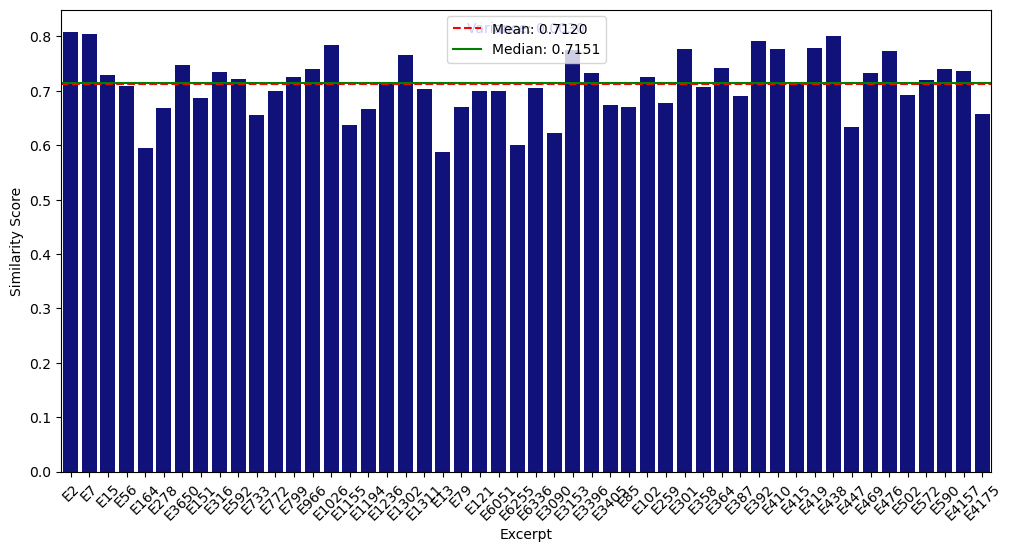

In [2]:
data = {
    "Excerpt": ["E2", "E7", "E15", "E56", "E164", "E278", "E3650", "E151", "E316", "E592",
                "E733", "E772","E799", "E966", "E1026", "E1155", "E1194", "E1236", "E1302", "E1311",
                 "E13", "E79", "E121","E6051","E6255","E6336","E3090","E3153","E3396","E3405",
                 "E85", "E102", "E259","E301","E358","E364","E387","E392","E410","E415",
                "E419", "E438","E447","E469","E476","E502","E572","E590","E4157","E4175"],
    "Similarity": [0.8089, 0.8052, 0.7298, 0.7079, 0.5951, 0.6685, 0.7478, 0.6866, 0.7350, 0.7213, 
                0.6553, 0.7004, 0.7260, 0.7399, 0.7839, 0.6374, 0.6659, 0.7165, 0.7664, 0.7034,
                0.5866, 0.6694, 0.6997,0.6991, 0.5996,0.7044,0.6216,0.7746,0.7335,0.6739,
                0.6705, 0.7261, 0.6767, 0.7776, 0.7067, 0.7418, 0.6907, 0.7908, 0.7772, 0.7138,
                0.7778, 0.8015, 0.6335, 0.7322, 0.7738, 0.6918, 0.7205, 0.7406, 0.7367, 0.6581]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate statistics
mean_value = df['Similarity'].mean()
median_value = df['Similarity'].median()
variance_value = df['Similarity'].var()

# Plot bar graph
plt.figure(figsize=(12, 6))
bar = sns.barplot(x="Excerpt", y="Similarity", data=df, color="darkblue")
plt.xlabel("Excerpt")
plt.ylabel("Similarity Score")
plt.axhline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.4f}')
plt.axhline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.4f}')

# Add variance in the chart's title or annotation
plt.annotate(f'Variance: {variance_value:.4f}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', color='blue')

# Display legend
plt.legend()

plt.xticks(rotation=45)
plt.show()

Get the number of articles above or below mean and median vaules.

In [11]:
# Filter articles that are above both the mean and median values
above_mean_median = df[(df['Similarity'] > mean_value) & (df['Similarity'] > median_value)]

# Filter articles that are not above both the mean and median values
below_mean_median = df[~((df['Similarity'] > mean_value) & (df['Similarity'] > median_value))]

# Count the number of articles
above_count = above_mean_median.shape[0]
below_count = below_mean_median.shape[0]

# Output results
above_articles = above_mean_median['Excerpt'].tolist()
below_articles = below_mean_median['Excerpt'].tolist()

print("Number of articles above both mean and median values:", above_count)
print("Articles above both mean and median values:", above_articles)
print("Number of articles not above both mean and median values:", below_count)
print("Articles not above both mean and median values:", below_articles)

Number of articles above both mean and median values: 25
Articles above both mean and median values: ['E2', 'E7', 'E15', 'E3650', 'E316', 'E592', 'E799', 'E966', 'E1026', 'E1236', 'E1302', 'E3153', 'E3396', 'E102', 'E301', 'E364', 'E392', 'E410', 'E419', 'E438', 'E469', 'E476', 'E572', 'E590', 'E4157']
Number of articles not above both mean and median values: 25
Articles not above both mean and median values: ['E56', 'E164', 'E278', 'E151', 'E733', 'E772', 'E1155', 'E1194', 'E1311', 'E13', 'E79', 'E121', 'E6051', 'E6255', 'E6336', 'E3090', 'E3405', 'E85', 'E259', 'E358', 'E387', 'E415', 'E447', 'E502', 'E4175']
